In [1]:
# IMPORT DEPENDENCIES
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from ffnn import FFNN 

## PROCEDURES

In [2]:
# PROCEDURES
def load_mnist_dataset():
    """
    load dataset
    """
    mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
    X, y = mnist.data, mnist.target
    X = X.astype('float32') / 255.0  
    y = y.astype('int')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    y_train_onehot = np.eye(10)[y_train]
    y_test_onehot = np.eye(10)[y_test]
    return X_train, X_test, y_train, y_test, y_train_onehot, y_test_onehot

def analyze_depth_and_width(X_train, X_test, y_train_onehot, y_test_onehot):
    """
    menganalisis pengaruh depth (banyak layer) dan width (banyak neuron per layer) dengan :
    - variasi width [[784, 128, 10], [784, 256, 10], [784, 512, 10]]
    - variasi depth [[784, 128, 10], [784, 128, 128, 10], [784, 128, 128, 128, 10]]
    """
    print("Analyzing Depth and Width")
    width_variations = [[784, 128, 10], [784, 256, 10], [784, 512, 10]]
    depth_variations = [[784, 128, 10], [784, 128, 128, 10], [784, 128, 128, 128, 10]]
    
    for i, layer_sizes in enumerate(width_variations, 1):
        print(f"\nWidth Variation {i}: {layer_sizes}")
        model = FFNN(layer_sizes=layer_sizes, activation_func=['relu']*(len(layer_sizes)-2) + ['softmax'], loss_func='cce', learning_rate=0.01)
        model.train(X_train, y_train_onehot, X_test, y_test_onehot, epochs=10, batch_size=64, verbose=1)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(np.argmax(y_test_onehot, axis=1), np.argmax(y_pred, axis=1))
        print(f"Accuracy: {accuracy}")
        model.plot_weight_distribution()
        model.plot_weight_gradient_distribution()

    for i, layer_sizes in enumerate(depth_variations, 1):
        print(f"\nDepth Variation {i}: {layer_sizes}")
        model = FFNN(layer_sizes=layer_sizes, activation_func=['relu']*(len(layer_sizes)-2) + ['softmax'], loss_func='cce', learning_rate=0.01)
        model.train(X_train, y_train_onehot, X_test, y_test_onehot, epochs=10, batch_size=64, verbose=1)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(np.argmax(y_test_onehot, axis=1), np.argmax(y_pred, axis=1))
        print(f"Accuracy: {accuracy}")
        model.plot_weight_distribution()
        model.plot_weight_gradient_distribution()

def analyze_activation_functions(X_train, X_test, y_train_onehot, y_test_onehot):
    """
    Menganalisis pengaruh fungsi aktivasi hidden layer dengan variasi fungsi : ['linear', 'relu', 'sigmoid', 'tanh', 'elu', 'leaky_relu']
    """
    print("Analyzing Activation Functions")
    activations = ['linear', 'relu', 'sigmoid', 'tanh', 'elu', 'leaky_relu']
    for activation in activations:
        print(f"\nActivation Function: {activation}")
        model = FFNN(layer_sizes=[784, 128, 10], activation_func=[activation, 'softmax'], loss_func='cce', learning_rate=0.01)
        model.train(X_train, y_train_onehot, X_test, y_test_onehot, epochs=10, batch_size=64, verbose=1)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(np.argmax(y_test_onehot, axis=1), np.argmax(y_pred, axis=1))
        print(f"Accuracy: {accuracy}")
        model.plot_weight_distribution()
        model.plot_weight_gradient_distribution()

def analyze_learning_rates(X_train, X_test, y_train_onehot, y_test_onehot):
    """
    Menganalisis pengaruh learning rate dengan variasi learning rate : [0.001, 0.01, 0.1]
    """
    print("Analyzing Learning Rates")
    learning_rates = [0.001, 0.01, 0.1]
    for lr in learning_rates:
        print(f"\nLearning Rate: {lr}")
        model = FFNN(layer_sizes=[784, 128, 10], activation_func=['relu', 'softmax'], loss_func='cce', learning_rate=lr)
        model.train(X_train, y_train_onehot, X_test, y_test_onehot, epochs=10, batch_size=64, verbose=1)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(np.argmax(y_test_onehot, axis=1), np.argmax(y_pred, axis=1))
        print(f"Accuracy: {accuracy}")
        model.plot_weight_distribution()
        model.plot_weight_gradient_distribution()

def analyze_weight_initialization(X_train, X_test, y_train_onehot, y_test_onehot):
    """
    Menganalisis pengaruh inisialisasi bobot dengan variasi : ['zero', 'uniform', 'normal', 'he', 'xavier']
    """
    print("Analyzing Weight Initialization")
    init_methods = ['zero', 'uniform', 'normal', 'he', 'xavier']
    for method in init_methods:
        print(f"\nInitialization Method: {method}")
        model = FFNN(layer_sizes=[784, 128, 10], activation_func=['relu', 'softmax'], loss_func='cce', weight_init=method, learning_rate=0.01)
        model.train(X_train, y_train_onehot, X_test, y_test_onehot, epochs=10, batch_size=64, verbose=1)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(np.argmax(y_test_onehot, axis=1), np.argmax(y_pred, axis=1))
        print(f"Accuracy: {accuracy}")
        model.plot_weight_distribution()
        model.plot_weight_gradient_distribution()

def analyze_regularization(X_train, X_test, y_train_onehot, y_test_onehot):
    """
    Menganalisis pengaruh regularisasi dengan percobaan :
    - tanpa regularisasi
    - dengan regularisasi L1
    - dengan regularisasi L2
    """
    print("Analyzing Regularization")
    print("\nTanpa Regularisasi")
    model = FFNN(layer_sizes=[784, 128, 10], activation_func=['relu', 'softmax'], loss_func='cce', learning_rate=0.01)
    model.train(X_train, y_train_onehot, X_test, y_test_onehot, epochs=10, batch_size=64, verbose=1)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(np.argmax(y_test_onehot, axis=1), np.argmax(y_pred, axis=1))
    print(f"Accuracy: {accuracy}")

    print("\nDengan Regularisasi L1")
    model = FFNN(layer_sizes=[784, 128, 10], activation_func=['relu', 'softmax'], loss_func='cce', learning_rate=0.01, l1_lambda=0.001)
    model.train(X_train, y_train_onehot, X_test, y_test_onehot, epochs=10, batch_size=64, verbose=1)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(np.argmax(y_test_onehot, axis=1), np.argmax(y_pred, axis=1))
    print(f"Accuracy: {accuracy}")

    print("\nDengan Regularisasi L2")
    model = FFNN(layer_sizes=[784, 128, 10], activation_func=['relu', 'softmax'], loss_func='cce', learning_rate=0.01, l2_lambda=0.001)
    model.train(X_train, y_train_onehot, X_test, y_test_onehot, epochs=10, batch_size=64, verbose=1)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(np.argmax(y_test_onehot, axis=1), np.argmax(y_pred, axis=1))
    print(f"Accuracy: {accuracy}")


def compare_with_sklearn(X_train, X_test, y_train, y_test):
    """
    Analisis perbandingan hasil prediksi dengan library sklearn MLP
    """
    print("Comparing with Sklearn MLP")
    model_ffnn = FFNN(layer_sizes=[784, 128, 10], activation_func=['relu', 'softmax'], loss_func='cce', learning_rate=0.01)
    model_ffnn.train(X_train, np.eye(10)[y_train], X_test, np.eye(10)[y_test], epochs=10, batch_size=64, verbose=1)
    y_pred_ffnn = model_ffnn.predict(X_test)
    accuracy_ffnn = accuracy_score(y_test, np.argmax(y_pred_ffnn, axis=1))
    print(f"Custom FFNN Accuracy: {accuracy_ffnn}")

    model_sklearn = MLPClassifier(hidden_layer_sizes=(128,), activation='relu', solver='adam', learning_rate_init=0.01, max_iter=10)
    model_sklearn.fit(X_train, y_train)
    y_pred_sklearn = model_sklearn.predict(X_test)
    accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
    print(f"Sklearn MLP Accuracy: {accuracy_sklearn}")

def visualize_ffnn_structure(model):
    print("Visualizing Network Structure...")
    model.visualize_network_structure(highlight_weights=True, highlight_gradients=False)

def visualize_weight_distribution(model):
    print("Visualizing Weight Distribution...")
    layers_to_visualize = range(len(model.layers)) 
    model.plot_weight_distribution(layers=layers_to_visualize)


def visualize_gradient_distribution(model):
    print("Visualizing Gradient Distribution...")
    layers_to_visualize = range(len(model.layers)) 
    model.plot_weight_gradient_distribution(layers=layers_to_visualize)

# PENGUJIAN

### Load Dataset

In [3]:
X_train, X_test, y_train, y_test, y_train_onehot, y_test_onehot = load_mnist_dataset()

### Analyze Depth and Width

Analyzing Depth and Width

Width Variation 1: [784, 128, 10]


Epoch 1/10: 100%|██████████| 56000/56000 [00:00<00:00, 108957.62samples/s]


	Train Loss: 0.2564 - Val Loss: 0.1299


Epoch 2/10: 100%|██████████| 56000/56000 [00:00<00:00, 115831.21samples/s]


	Train Loss: 0.1082 - Val Loss: 0.1132


Epoch 3/10: 100%|██████████| 56000/56000 [00:00<00:00, 115728.31samples/s]


	Train Loss: 0.0767 - Val Loss: 0.0980


Epoch 4/10: 100%|██████████| 56000/56000 [00:00<00:00, 122867.06samples/s]


	Train Loss: 0.0594 - Val Loss: 0.0922


Epoch 5/10: 100%|██████████| 56000/56000 [00:00<00:00, 118618.39samples/s]


	Train Loss: 0.0464 - Val Loss: 0.0882


Epoch 6/10: 100%|██████████| 56000/56000 [00:00<00:00, 118187.34samples/s]


	Train Loss: 0.0362 - Val Loss: 0.0944


Epoch 7/10: 100%|██████████| 56000/56000 [00:00<00:00, 124956.26samples/s]


	Train Loss: 0.0279 - Val Loss: 0.0976


Epoch 8/10: 100%|██████████| 56000/56000 [00:00<00:00, 115039.13samples/s]


	Train Loss: 0.0221 - Val Loss: 0.1049


Epoch 9/10: 100%|██████████| 56000/56000 [00:00<00:00, 103073.24samples/s]


	Train Loss: 0.0192 - Val Loss: 0.1214


Epoch 10/10: 100%|██████████| 56000/56000 [00:00<00:00, 113710.91samples/s]


	Train Loss: 0.0145 - Val Loss: 0.0863
Accuracy: 0.9772142857142857


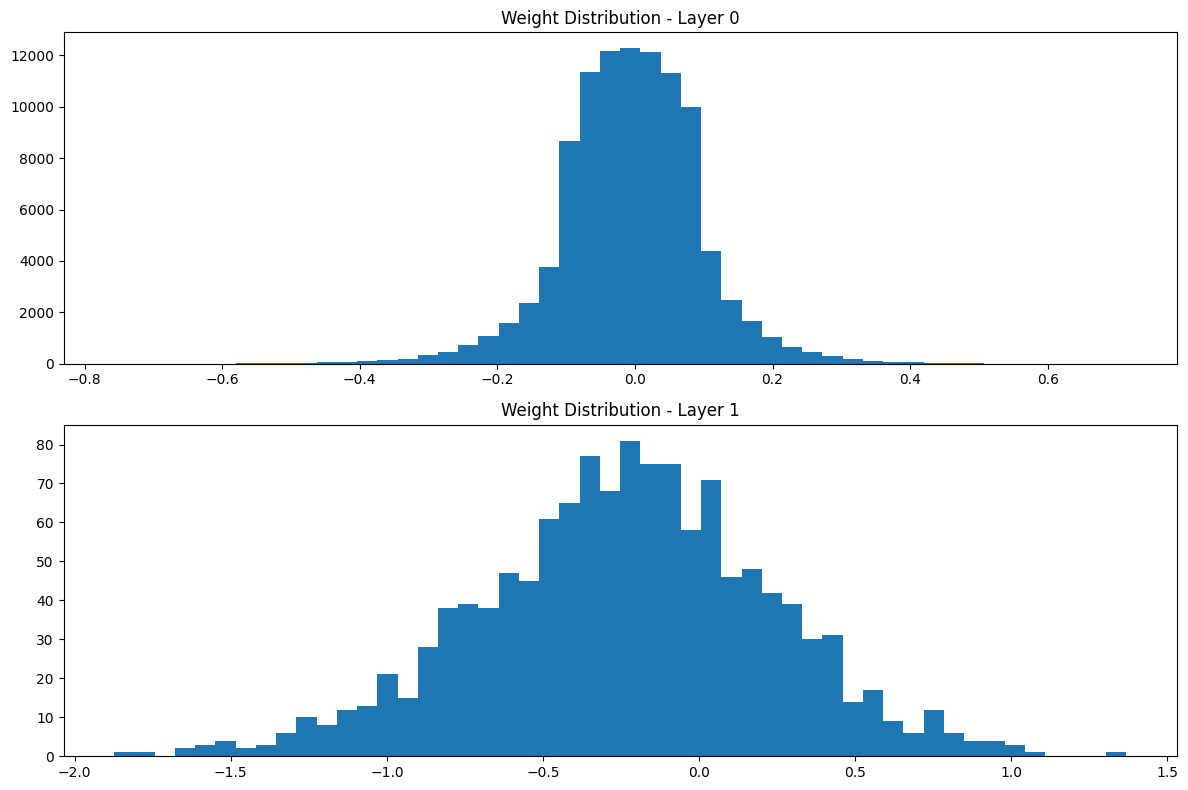

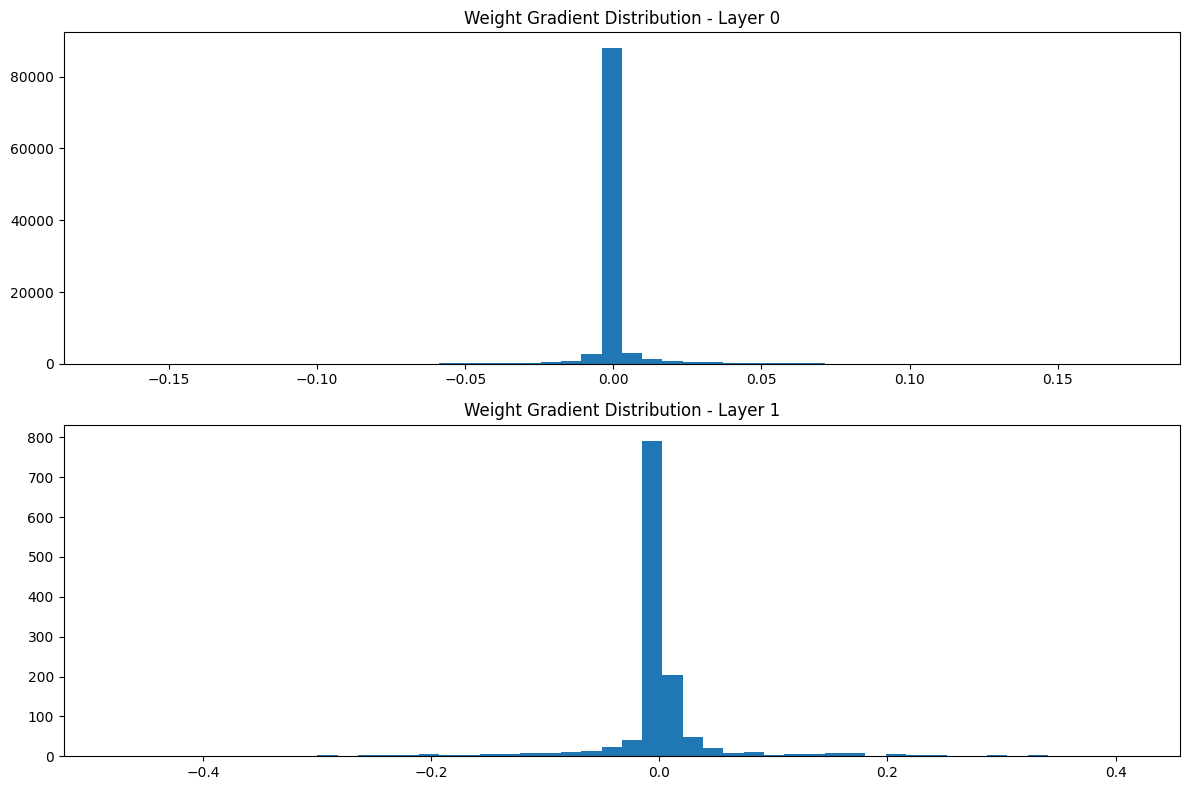


Width Variation 2: [784, 256, 10]


Epoch 1/10: 100%|██████████| 56000/56000 [00:01<00:00, 50067.11samples/s]


	Train Loss: 0.2309 - Val Loss: 0.1325


Epoch 2/10: 100%|██████████| 56000/56000 [00:00<00:00, 57206.18samples/s]


	Train Loss: 0.0945 - Val Loss: 0.1034


Epoch 3/10: 100%|██████████| 56000/56000 [00:00<00:00, 61428.92samples/s]


	Train Loss: 0.0661 - Val Loss: 0.1010


Epoch 4/10: 100%|██████████| 56000/56000 [00:00<00:00, 65851.35samples/s]


	Train Loss: 0.0469 - Val Loss: 0.0866


Epoch 5/10: 100%|██████████| 56000/56000 [00:00<00:00, 66899.37samples/s]


	Train Loss: 0.0353 - Val Loss: 0.0862


Epoch 6/10: 100%|██████████| 56000/56000 [00:00<00:00, 65917.03samples/s]


	Train Loss: 0.0254 - Val Loss: 0.0824


Epoch 7/10: 100%|██████████| 56000/56000 [00:00<00:00, 66827.92samples/s]


	Train Loss: 0.0197 - Val Loss: 0.1059


Epoch 8/10: 100%|██████████| 56000/56000 [00:00<00:00, 66234.12samples/s]


	Train Loss: 0.0135 - Val Loss: 0.0890


Epoch 9/10: 100%|██████████| 56000/56000 [00:00<00:00, 63778.20samples/s]


	Train Loss: 0.0098 - Val Loss: 0.0803


Epoch 10/10: 100%|██████████| 56000/56000 [00:00<00:00, 61492.70samples/s]


	Train Loss: 0.0066 - Val Loss: 0.0760
Accuracy: 0.9789285714285715


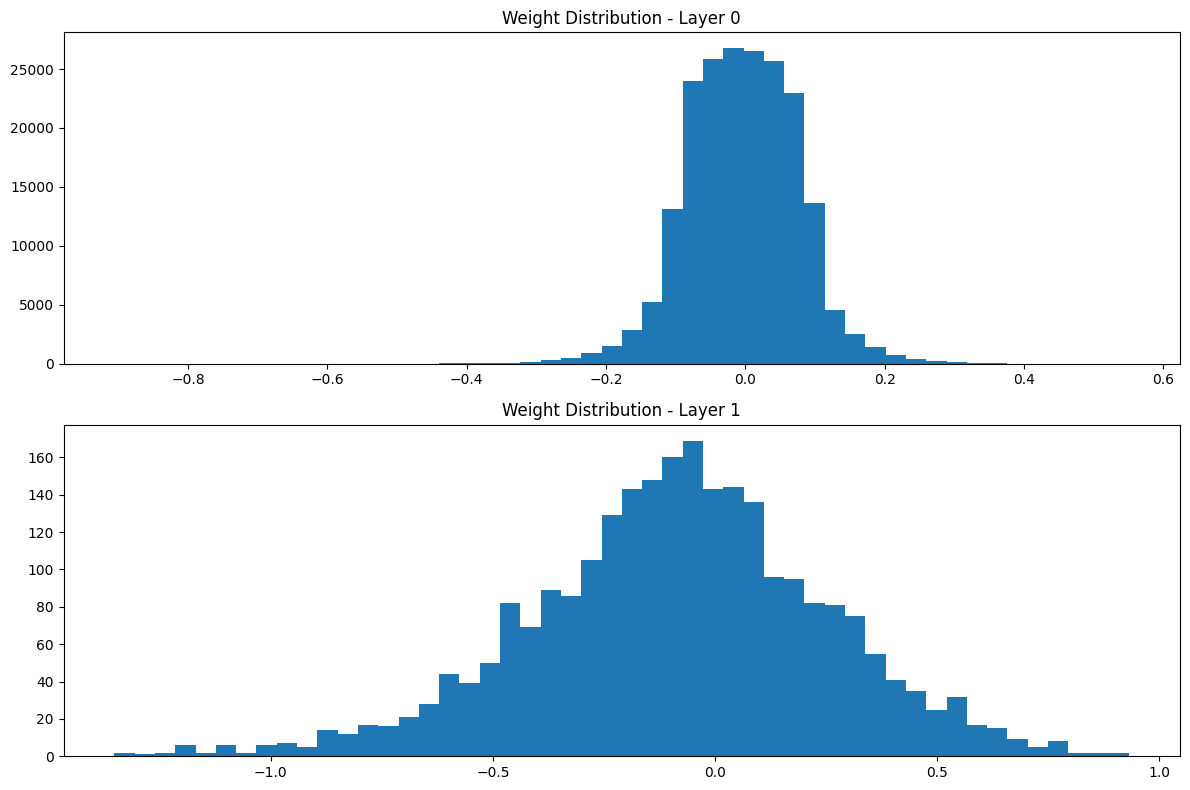

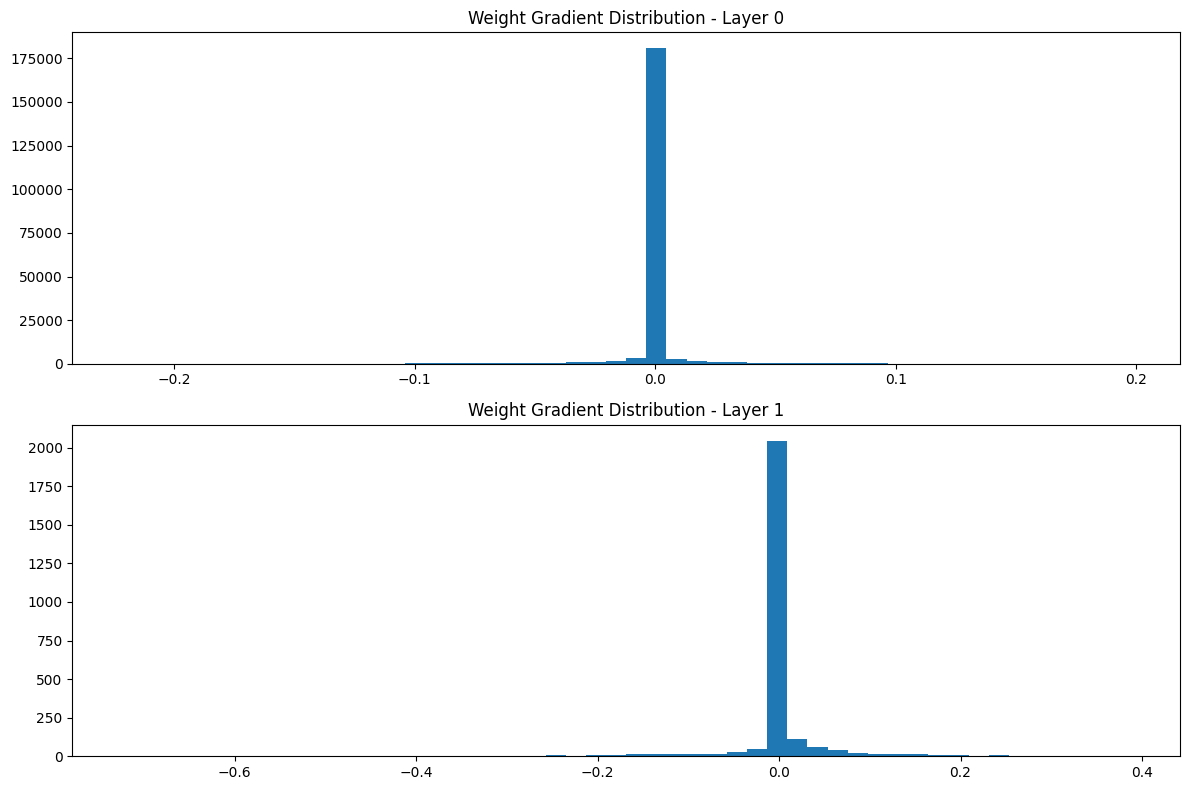


Width Variation 3: [784, 512, 10]


Epoch 1/10: 100%|██████████| 56000/56000 [00:01<00:00, 31541.12samples/s]


	Train Loss: 0.2153 - Val Loss: 0.1170


Epoch 2/10: 100%|██████████| 56000/56000 [00:02<00:00, 26902.20samples/s]


	Train Loss: 0.0839 - Val Loss: 0.0998


Epoch 3/10: 100%|██████████| 56000/56000 [00:01<00:00, 31738.05samples/s]


	Train Loss: 0.0536 - Val Loss: 0.0965


Epoch 4/10: 100%|██████████| 56000/56000 [00:01<00:00, 32646.61samples/s]


	Train Loss: 0.0375 - Val Loss: 0.0722


Epoch 5/10: 100%|██████████| 56000/56000 [00:01<00:00, 33009.55samples/s]


	Train Loss: 0.0252 - Val Loss: 0.0731


Epoch 6/10: 100%|██████████| 56000/56000 [00:01<00:00, 32666.47samples/s]


	Train Loss: 0.0176 - Val Loss: 0.0740


Epoch 7/10: 100%|██████████| 56000/56000 [00:01<00:00, 33210.91samples/s]


	Train Loss: 0.0115 - Val Loss: 0.0735


Epoch 8/10: 100%|██████████| 56000/56000 [00:01<00:00, 32322.35samples/s]


	Train Loss: 0.0075 - Val Loss: 0.0696


Epoch 9/10: 100%|██████████| 56000/56000 [00:01<00:00, 33010.36samples/s]


	Train Loss: 0.0045 - Val Loss: 0.0690


Epoch 10/10: 100%|██████████| 56000/56000 [00:01<00:00, 33193.07samples/s]


	Train Loss: 0.0028 - Val Loss: 0.0700
Accuracy: 0.9819285714285715


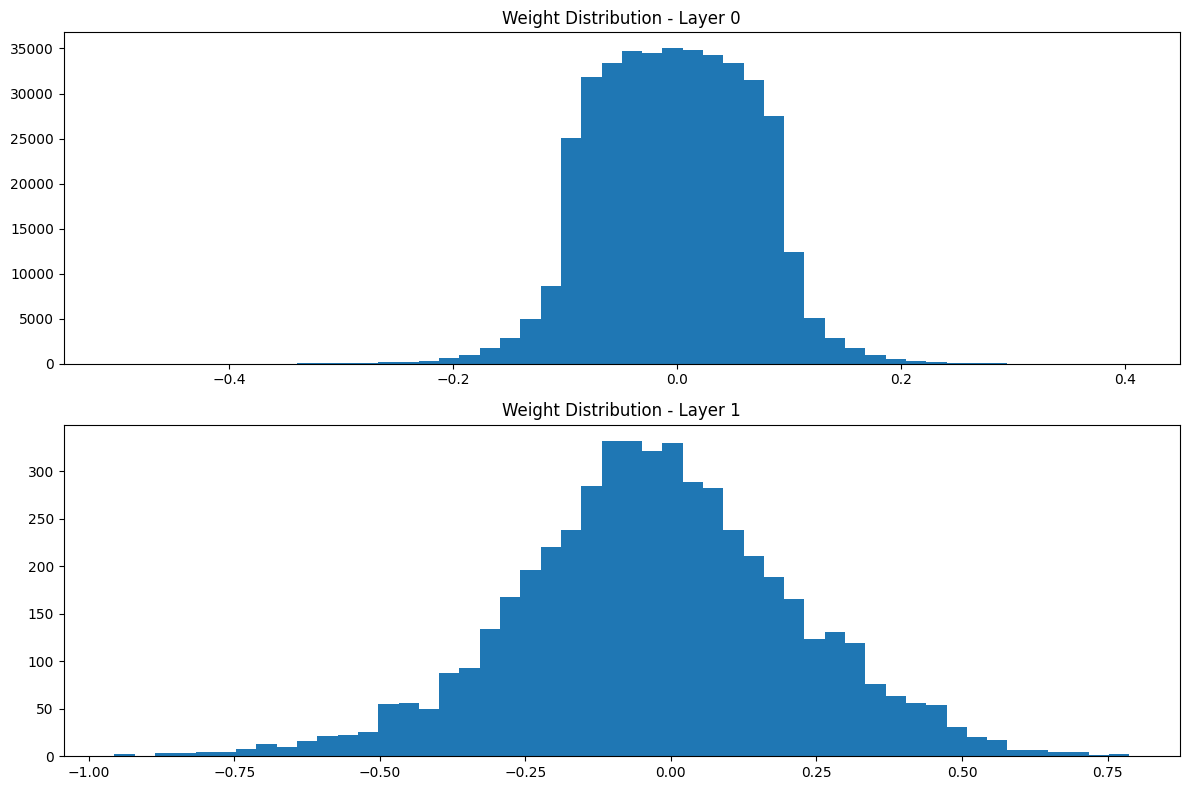

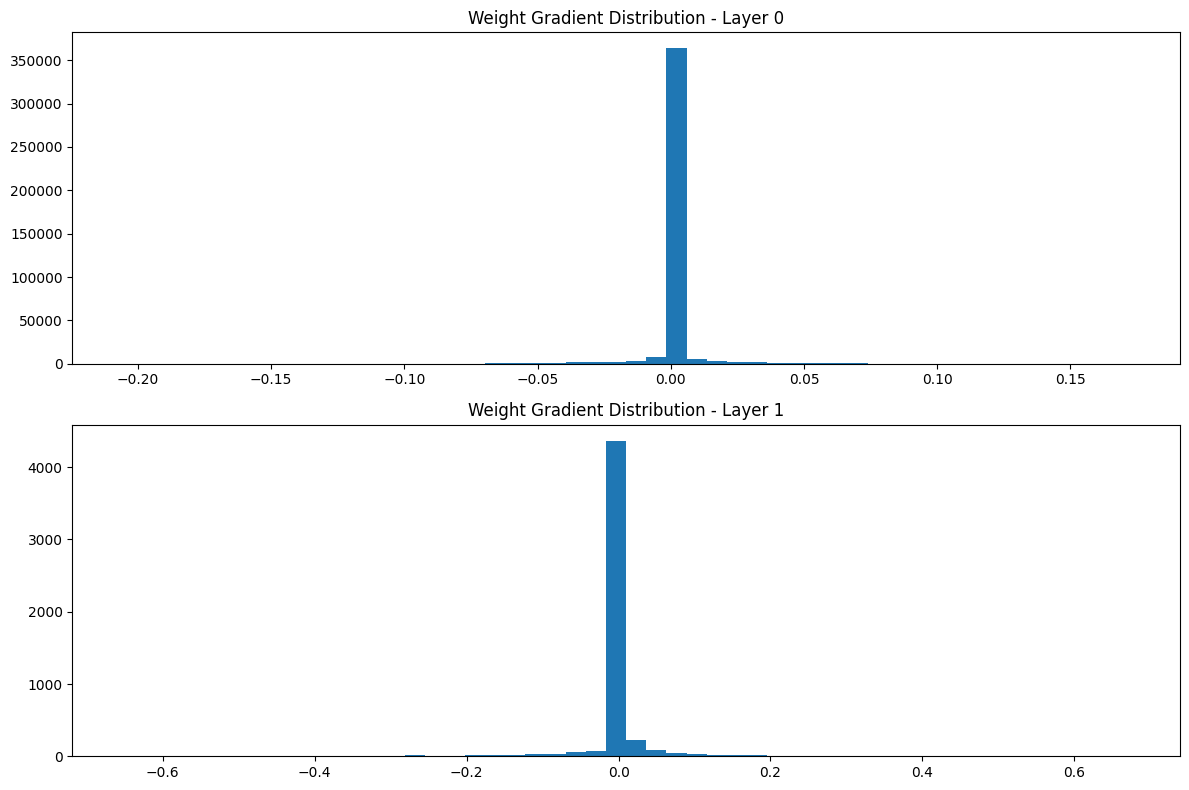


Depth Variation 1: [784, 128, 10]


Epoch 1/10: 100%|██████████| 56000/56000 [00:00<00:00, 116684.63samples/s]


	Train Loss: 0.2583 - Val Loss: 0.1440


Epoch 2/10: 100%|██████████| 56000/56000 [00:00<00:00, 120745.37samples/s]


	Train Loss: 0.1079 - Val Loss: 0.1186


Epoch 3/10: 100%|██████████| 56000/56000 [00:00<00:00, 121293.58samples/s]


	Train Loss: 0.0756 - Val Loss: 0.0987


Epoch 4/10: 100%|██████████| 56000/56000 [00:00<00:00, 126249.24samples/s]


	Train Loss: 0.0579 - Val Loss: 0.1017


Epoch 5/10: 100%|██████████| 56000/56000 [00:00<00:00, 127789.13samples/s]


	Train Loss: 0.0443 - Val Loss: 0.0947


Epoch 6/10: 100%|██████████| 56000/56000 [00:00<00:00, 129502.58samples/s]


	Train Loss: 0.0347 - Val Loss: 0.0880


Epoch 7/10: 100%|██████████| 56000/56000 [00:00<00:00, 123834.65samples/s]


	Train Loss: 0.0284 - Val Loss: 0.0954


Epoch 8/10: 100%|██████████| 56000/56000 [00:00<00:00, 127566.07samples/s]


	Train Loss: 0.0231 - Val Loss: 0.0908


Epoch 9/10: 100%|██████████| 56000/56000 [00:00<00:00, 112145.13samples/s]


	Train Loss: 0.0171 - Val Loss: 0.0974


Epoch 10/10: 100%|██████████| 56000/56000 [00:00<00:00, 126633.20samples/s]


	Train Loss: 0.0128 - Val Loss: 0.0976
Accuracy: 0.9754285714285714


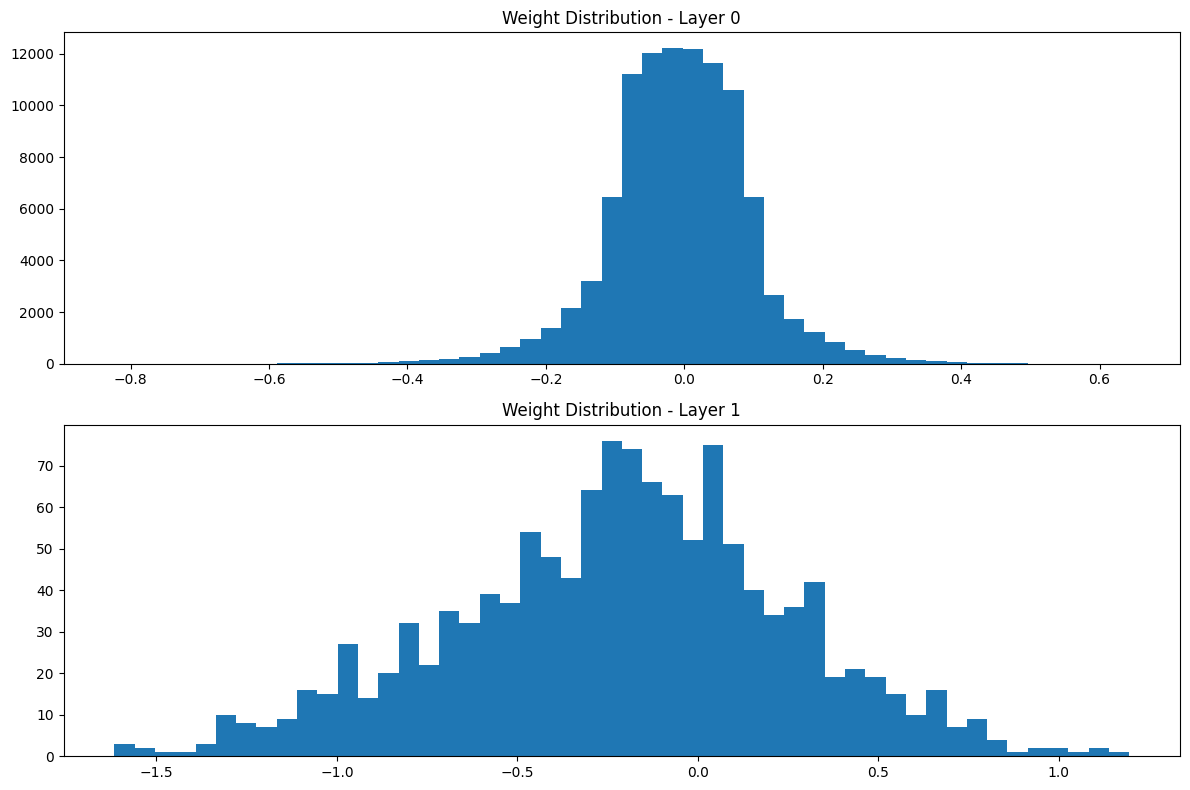

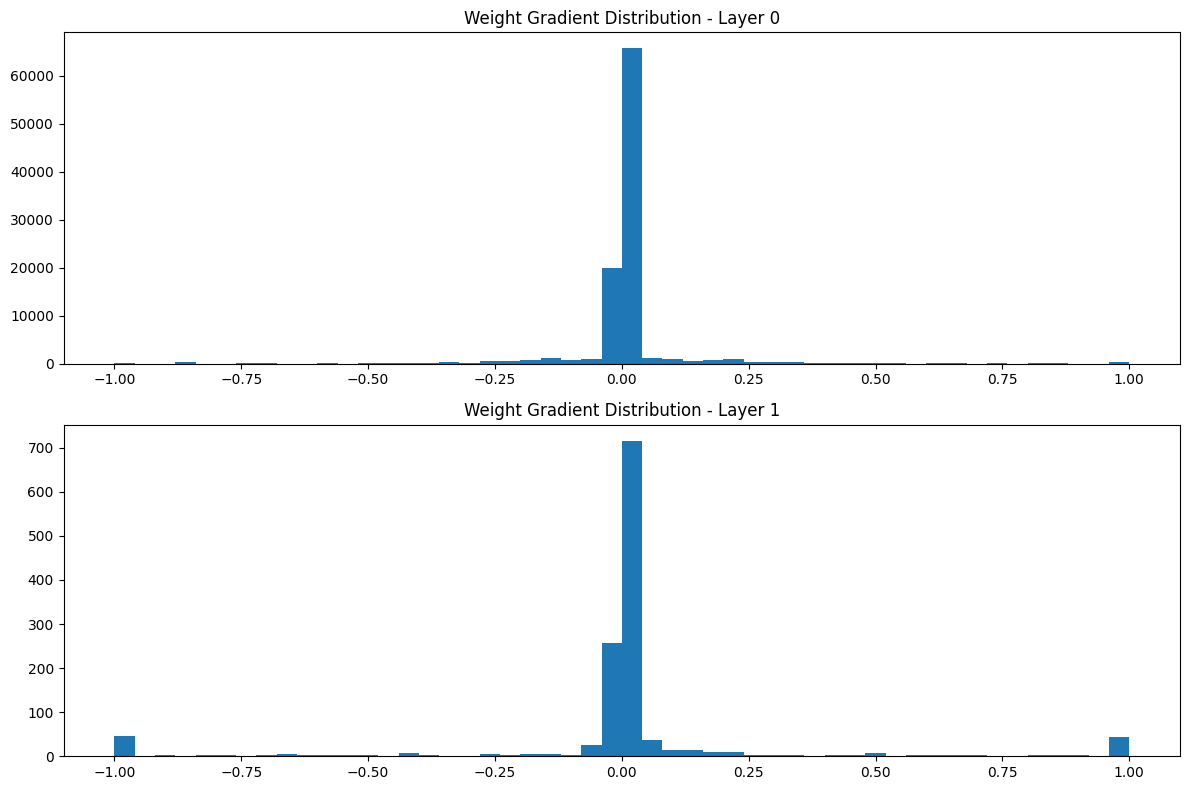


Depth Variation 2: [784, 128, 128, 10]


Epoch 1/10: 100%|██████████| 56000/56000 [00:00<00:00, 108141.13samples/s]


	Train Loss: 0.2767 - Val Loss: 0.1412


Epoch 2/10: 100%|██████████| 56000/56000 [00:00<00:00, 109005.20samples/s]


	Train Loss: 0.1088 - Val Loss: 0.1107


Epoch 3/10: 100%|██████████| 56000/56000 [00:00<00:00, 106136.64samples/s]


	Train Loss: 0.0808 - Val Loss: 0.1253


Epoch 4/10: 100%|██████████| 56000/56000 [00:00<00:00, 106483.13samples/s]


	Train Loss: 0.0603 - Val Loss: 0.1172


Epoch 5/10: 100%|██████████| 56000/56000 [00:00<00:00, 107340.72samples/s]


	Train Loss: 0.0488 - Val Loss: 0.1064


Epoch 6/10: 100%|██████████| 56000/56000 [00:00<00:00, 110208.21samples/s]


	Train Loss: 0.0408 - Val Loss: 0.1136


Epoch 7/10: 100%|██████████| 56000/56000 [00:00<00:00, 108966.16samples/s]


	Train Loss: 0.0331 - Val Loss: 0.1063


Epoch 8/10: 100%|██████████| 56000/56000 [00:00<00:00, 109151.14samples/s]


	Train Loss: 0.0265 - Val Loss: 0.1131


Epoch 9/10: 100%|██████████| 56000/56000 [00:00<00:00, 108056.61samples/s]


	Train Loss: 0.0237 - Val Loss: 0.1126


Epoch 10/10: 100%|██████████| 56000/56000 [00:00<00:00, 107437.79samples/s]


	Train Loss: 0.0195 - Val Loss: 0.1167
Accuracy: 0.9772857142857143


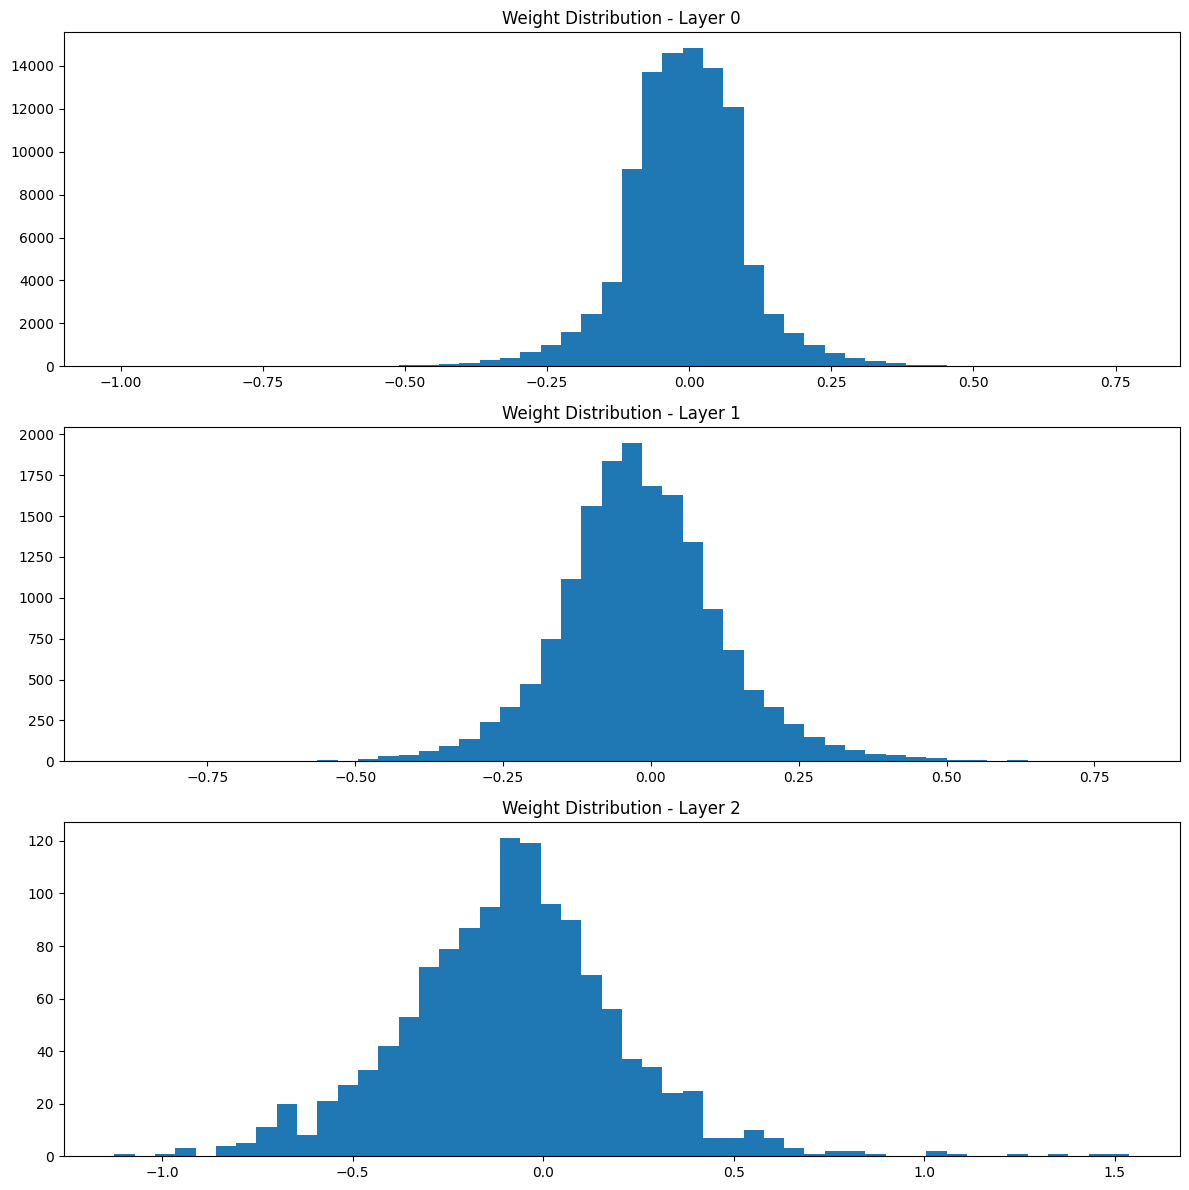

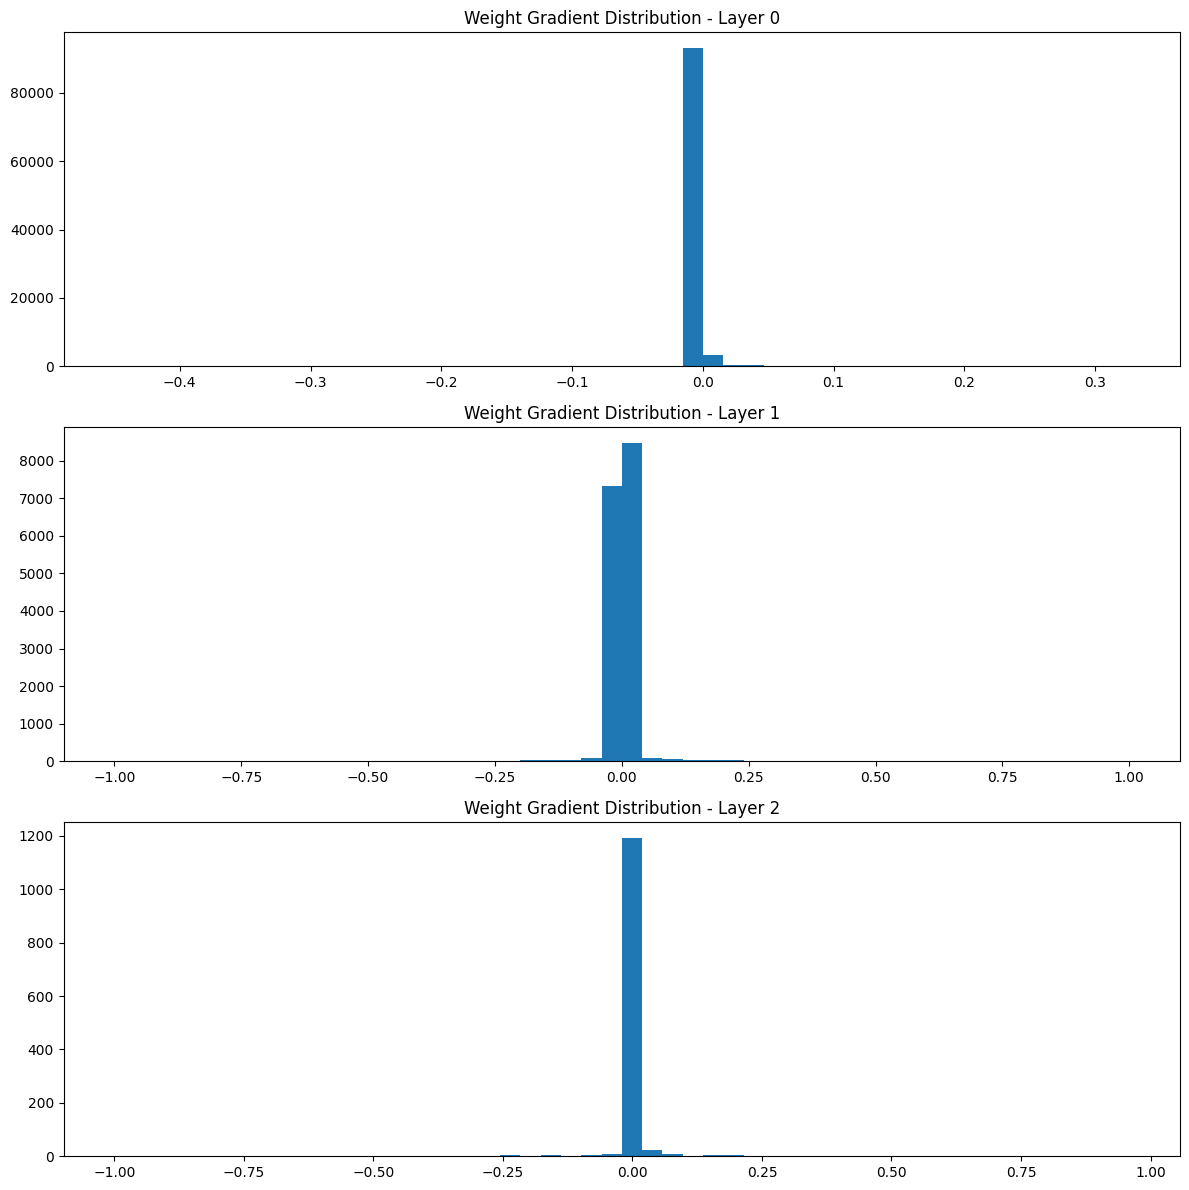


Depth Variation 3: [784, 128, 128, 128, 10]


Epoch 1/10: 100%|██████████| 56000/56000 [00:00<00:00, 92763.30samples/s]


	Train Loss: 0.3370 - Val Loss: 0.1625


Epoch 2/10: 100%|██████████| 56000/56000 [00:00<00:00, 93038.44samples/s]


	Train Loss: 0.1372 - Val Loss: 0.1350


Epoch 3/10: 100%|██████████| 56000/56000 [00:00<00:00, 96749.40samples/s]


	Train Loss: 0.1125 - Val Loss: 0.1479


Epoch 4/10: 100%|██████████| 56000/56000 [00:00<00:00, 95919.49samples/s]


	Train Loss: 0.0984 - Val Loss: 0.1721


Epoch 5/10: 100%|██████████| 56000/56000 [00:00<00:00, 96655.68samples/s]


	Train Loss: 0.0932 - Val Loss: 0.1664


Epoch 6/10: 100%|██████████| 56000/56000 [00:00<00:00, 95118.52samples/s]


	Train Loss: 0.0912 - Val Loss: 0.1813


Epoch 7/10: 100%|██████████| 56000/56000 [00:00<00:00, 96590.53samples/s]


	Train Loss: 0.0877 - Val Loss: 0.1761


Epoch 8/10: 100%|██████████| 56000/56000 [00:00<00:00, 97042.43samples/s]


	Train Loss: 0.0791 - Val Loss: 0.2546


Epoch 9/10: 100%|██████████| 56000/56000 [00:00<00:00, 97226.49samples/s]


	Train Loss: 0.0805 - Val Loss: 0.2065


Epoch 10/10: 100%|██████████| 56000/56000 [00:00<00:00, 87346.89samples/s]


	Train Loss: 0.0820 - Val Loss: 0.2759
Accuracy: 0.9615


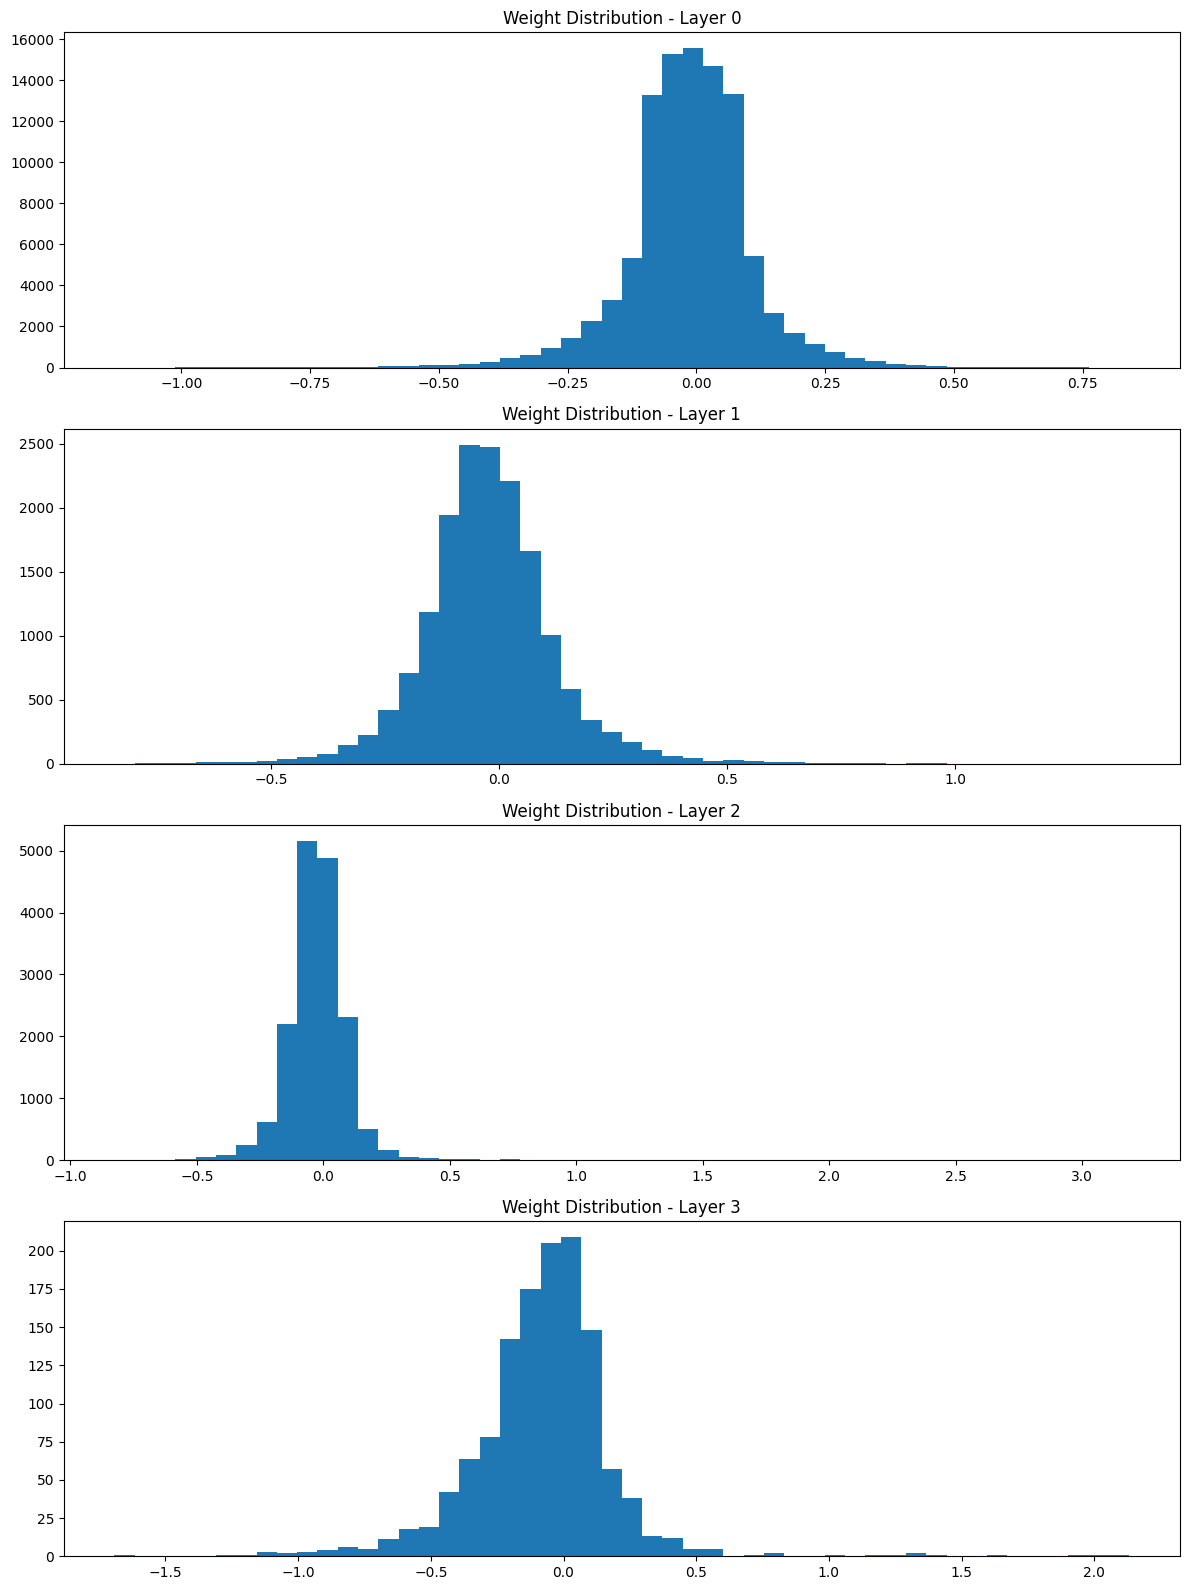

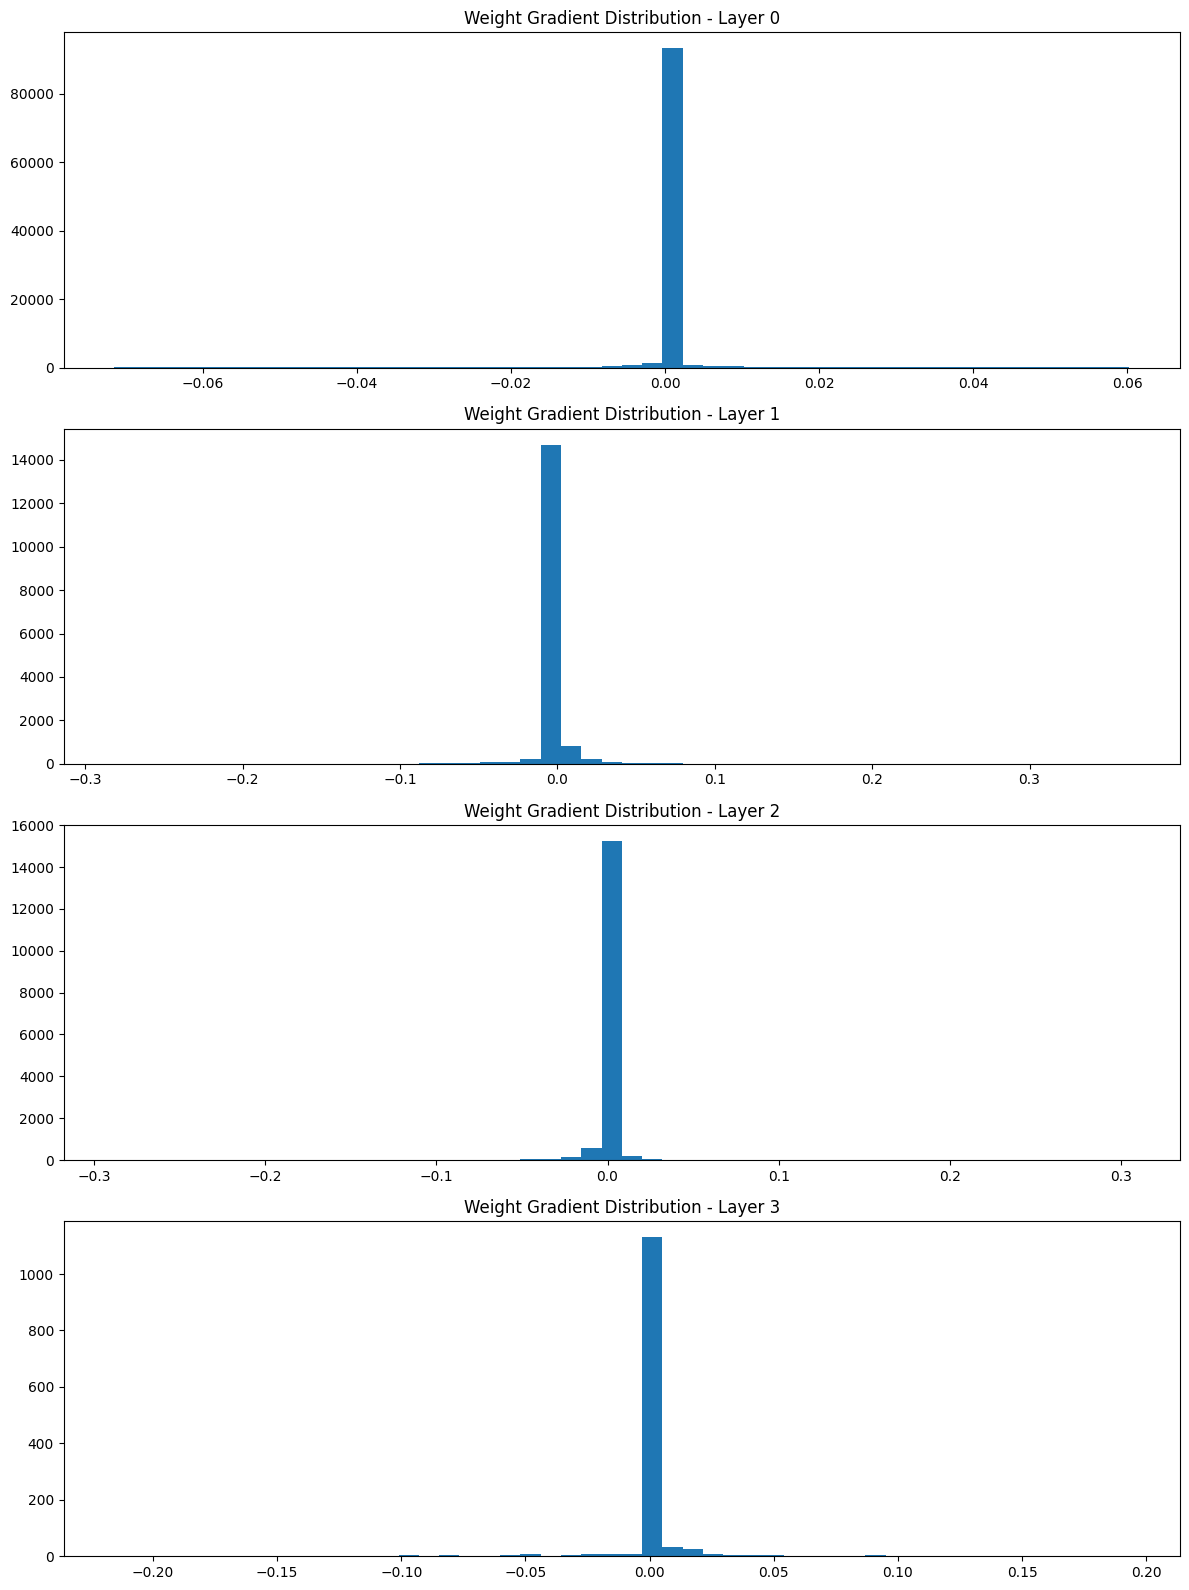

In [4]:
analyze_depth_and_width(X_train, X_test, y_train_onehot, y_test_onehot)

### Analyze Activation Functions

Analyzing Activation Functions

Activation Function: linear


Epoch 1/10: 100%|██████████| 56000/56000 [00:00<00:00, 142515.03samples/s]


	Train Loss: 0.4397 - Val Loss: 0.3854


Epoch 2/10: 100%|██████████| 56000/56000 [00:00<00:00, 136020.03samples/s]


	Train Loss: 0.3773 - Val Loss: 0.3746


Epoch 3/10: 100%|██████████| 56000/56000 [00:00<00:00, 145885.39samples/s]


	Train Loss: 0.3564 - Val Loss: 0.5277


Epoch 4/10: 100%|██████████| 56000/56000 [00:00<00:00, 138387.46samples/s]


	Train Loss: 0.3557 - Val Loss: 0.3782


Epoch 5/10: 100%|██████████| 56000/56000 [00:00<00:00, 135295.76samples/s]


	Train Loss: 0.3545 - Val Loss: 0.4053


Epoch 6/10: 100%|██████████| 56000/56000 [00:00<00:00, 133194.72samples/s]


	Train Loss: 0.3486 - Val Loss: 0.3773


Epoch 7/10: 100%|██████████| 56000/56000 [00:00<00:00, 141743.16samples/s]


	Train Loss: 0.3422 - Val Loss: 0.4628


Epoch 8/10: 100%|██████████| 56000/56000 [00:00<00:00, 138228.32samples/s]


	Train Loss: 0.3404 - Val Loss: 0.3960


Epoch 9/10: 100%|██████████| 56000/56000 [00:00<00:00, 146919.09samples/s]


	Train Loss: 0.3345 - Val Loss: 0.4039


Epoch 10/10: 100%|██████████| 56000/56000 [00:00<00:00, 141629.74samples/s]


	Train Loss: 0.3320 - Val Loss: 0.3717
Accuracy: 0.9026428571428572


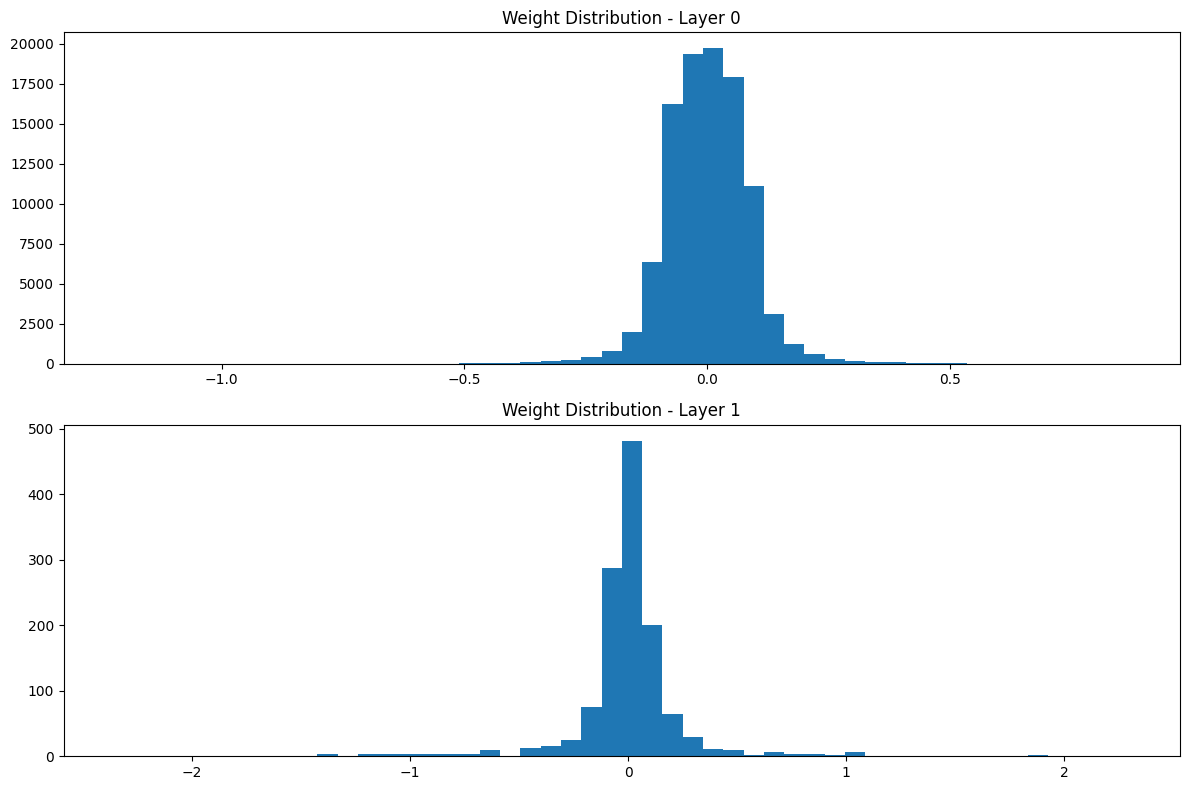

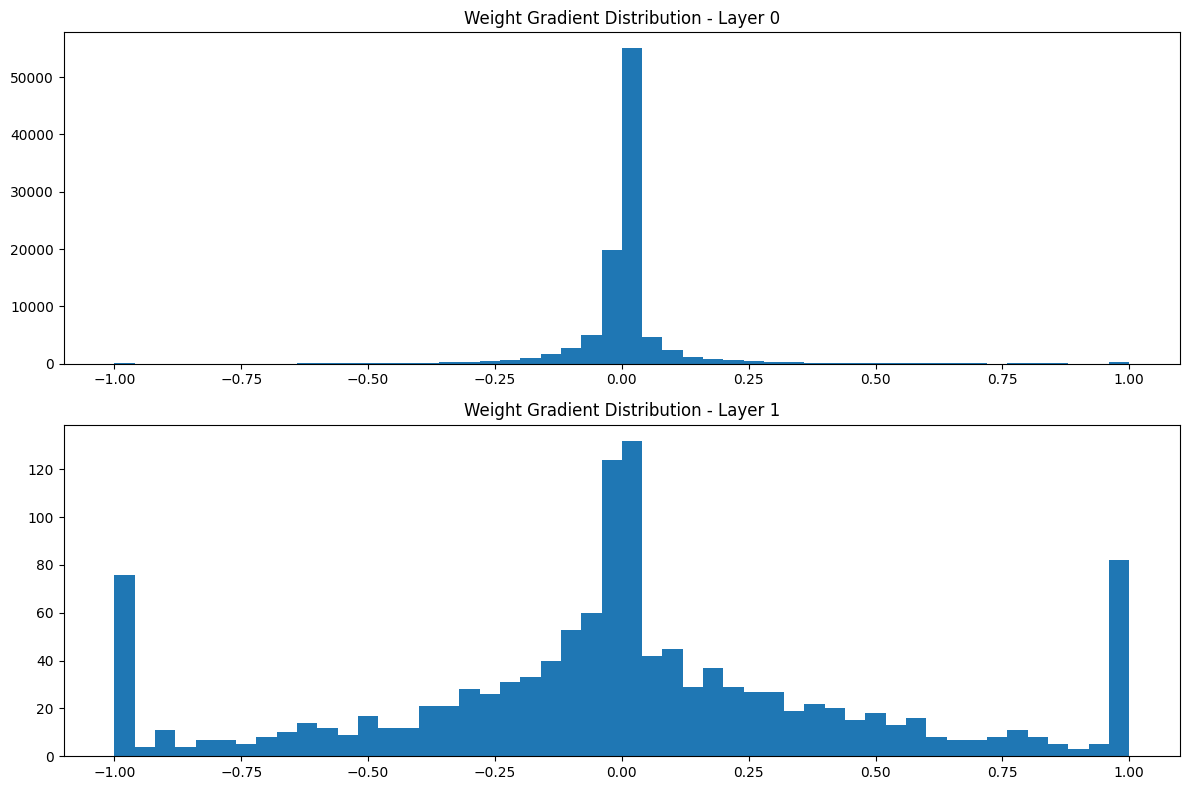


Activation Function: relu


Epoch 1/10: 100%|██████████| 56000/56000 [00:00<00:00, 146821.56samples/s]


	Train Loss: 0.2527 - Val Loss: 0.1526


Epoch 2/10: 100%|██████████| 56000/56000 [00:00<00:00, 144696.84samples/s]


	Train Loss: 0.1079 - Val Loss: 0.1146


Epoch 3/10: 100%|██████████| 56000/56000 [00:00<00:00, 145286.66samples/s]


	Train Loss: 0.0785 - Val Loss: 0.1127


Epoch 4/10: 100%|██████████| 56000/56000 [00:00<00:00, 145138.98samples/s]


	Train Loss: 0.0573 - Val Loss: 0.0976


Epoch 5/10: 100%|██████████| 56000/56000 [00:00<00:00, 147003.96samples/s]


	Train Loss: 0.0469 - Val Loss: 0.0946


Epoch 6/10: 100%|██████████| 56000/56000 [00:00<00:00, 146282.80samples/s]


	Train Loss: 0.0355 - Val Loss: 0.0999


Epoch 7/10: 100%|██████████| 56000/56000 [00:00<00:00, 145685.33samples/s]


	Train Loss: 0.0281 - Val Loss: 0.0966


Epoch 8/10: 100%|██████████| 56000/56000 [00:00<00:00, 145836.66samples/s]


	Train Loss: 0.0216 - Val Loss: 0.0920


Epoch 9/10: 100%|██████████| 56000/56000 [00:00<00:00, 145747.98samples/s]


	Train Loss: 0.0172 - Val Loss: 0.0917


Epoch 10/10: 100%|██████████| 56000/56000 [00:00<00:00, 145928.44samples/s]


	Train Loss: 0.0139 - Val Loss: 0.0950
Accuracy: 0.9735


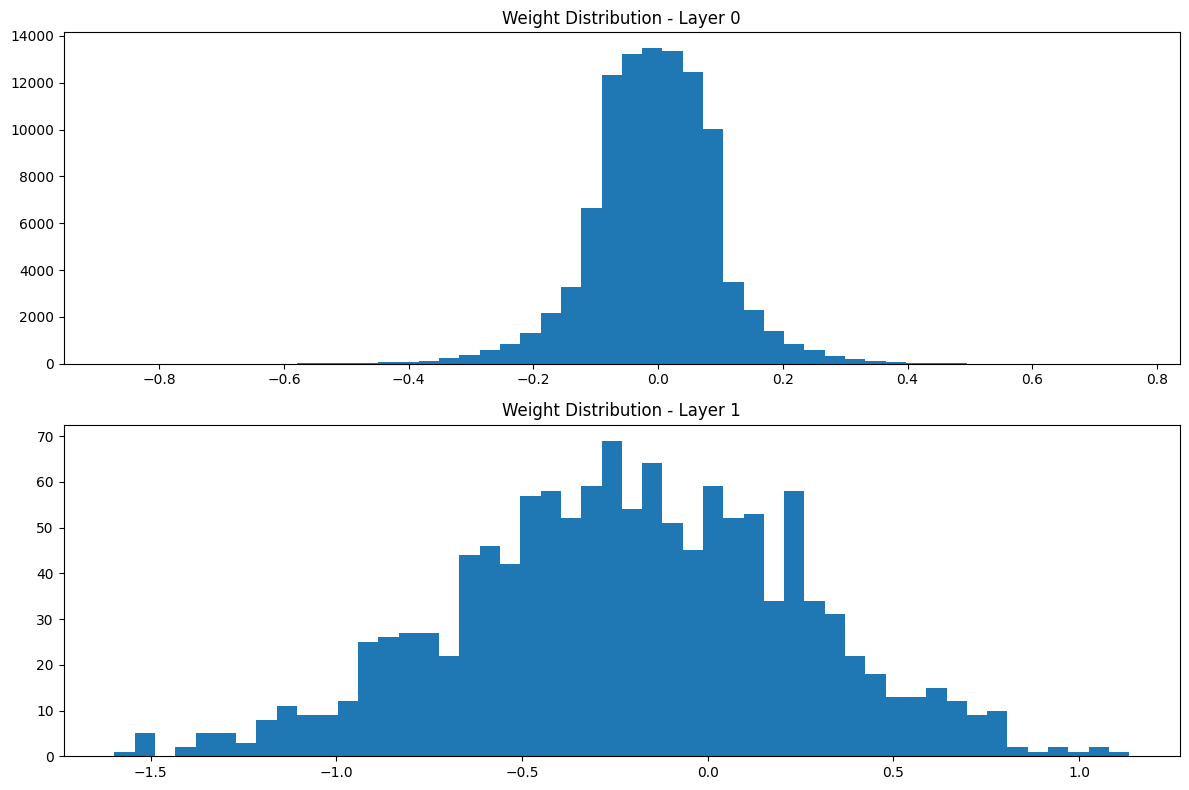

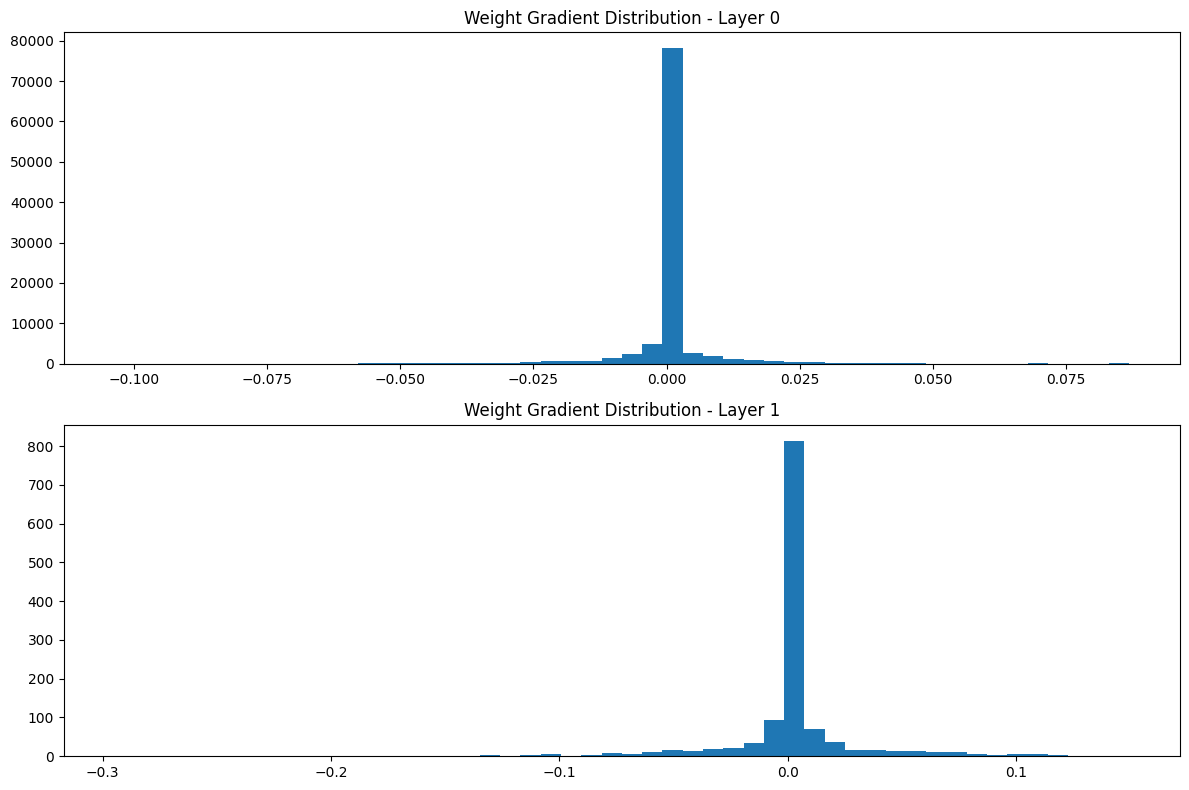


Activation Function: sigmoid


Epoch 1/10: 100%|██████████| 56000/56000 [00:00<00:00, 133802.56samples/s]


	Train Loss: 0.4705 - Val Loss: 0.3218


Epoch 2/10: 100%|██████████| 56000/56000 [00:00<00:00, 128357.58samples/s]


	Train Loss: 0.3070 - Val Loss: 0.3079


Epoch 3/10: 100%|██████████| 56000/56000 [00:00<00:00, 131830.47samples/s]


	Train Loss: 0.2922 - Val Loss: 0.2951


Epoch 4/10: 100%|██████████| 56000/56000 [00:00<00:00, 126466.22samples/s]


	Train Loss: 0.2853 - Val Loss: 0.2854


Epoch 5/10: 100%|██████████| 56000/56000 [00:00<00:00, 134251.71samples/s]


	Train Loss: 0.2766 - Val Loss: 0.2846


Epoch 6/10: 100%|██████████| 56000/56000 [00:00<00:00, 133770.63samples/s]


	Train Loss: 0.2677 - Val Loss: 0.2748


Epoch 7/10: 100%|██████████| 56000/56000 [00:00<00:00, 132031.22samples/s]


	Train Loss: 0.2598 - Val Loss: 0.2854


Epoch 8/10: 100%|██████████| 56000/56000 [00:00<00:00, 131120.58samples/s]


	Train Loss: 0.2520 - Val Loss: 0.2711


Epoch 9/10: 100%|██████████| 56000/56000 [00:00<00:00, 134237.90samples/s]


	Train Loss: 0.2473 - Val Loss: 0.2730


Epoch 10/10: 100%|██████████| 56000/56000 [00:00<00:00, 125430.36samples/s]


	Train Loss: 0.2451 - Val Loss: 0.2681
Accuracy: 0.9208571428571428


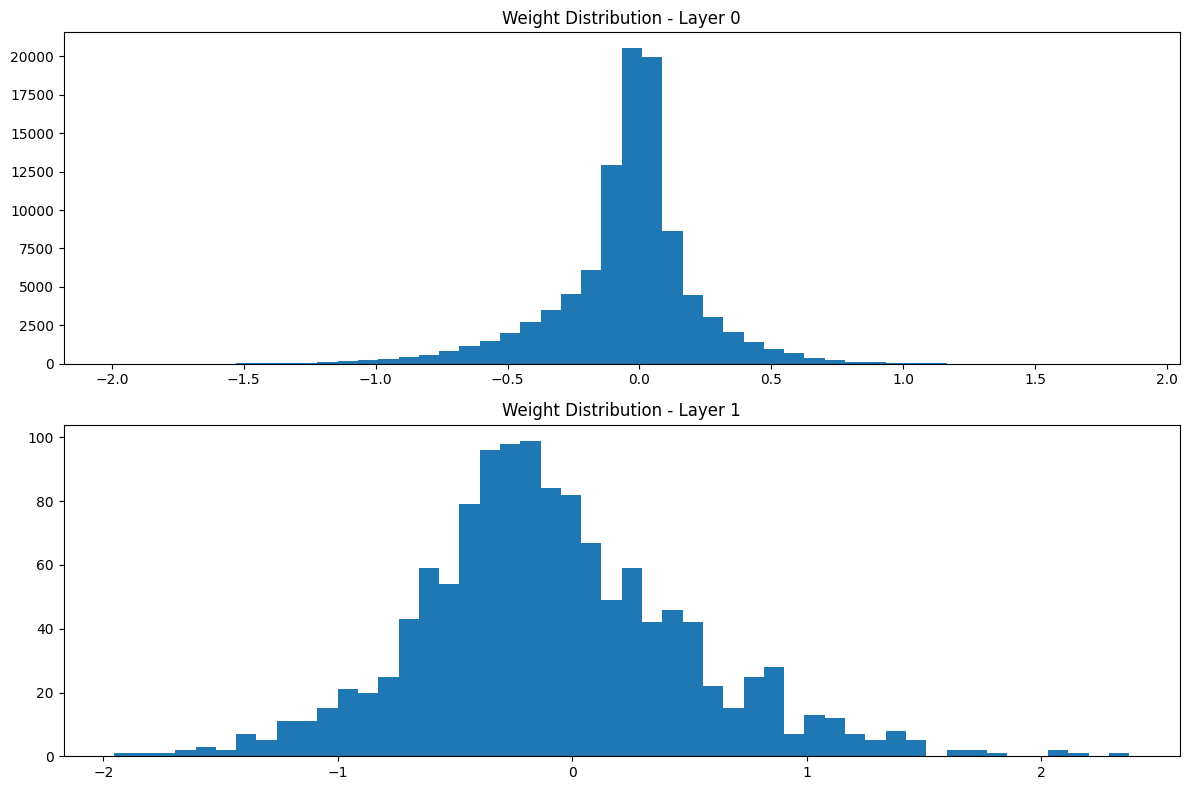

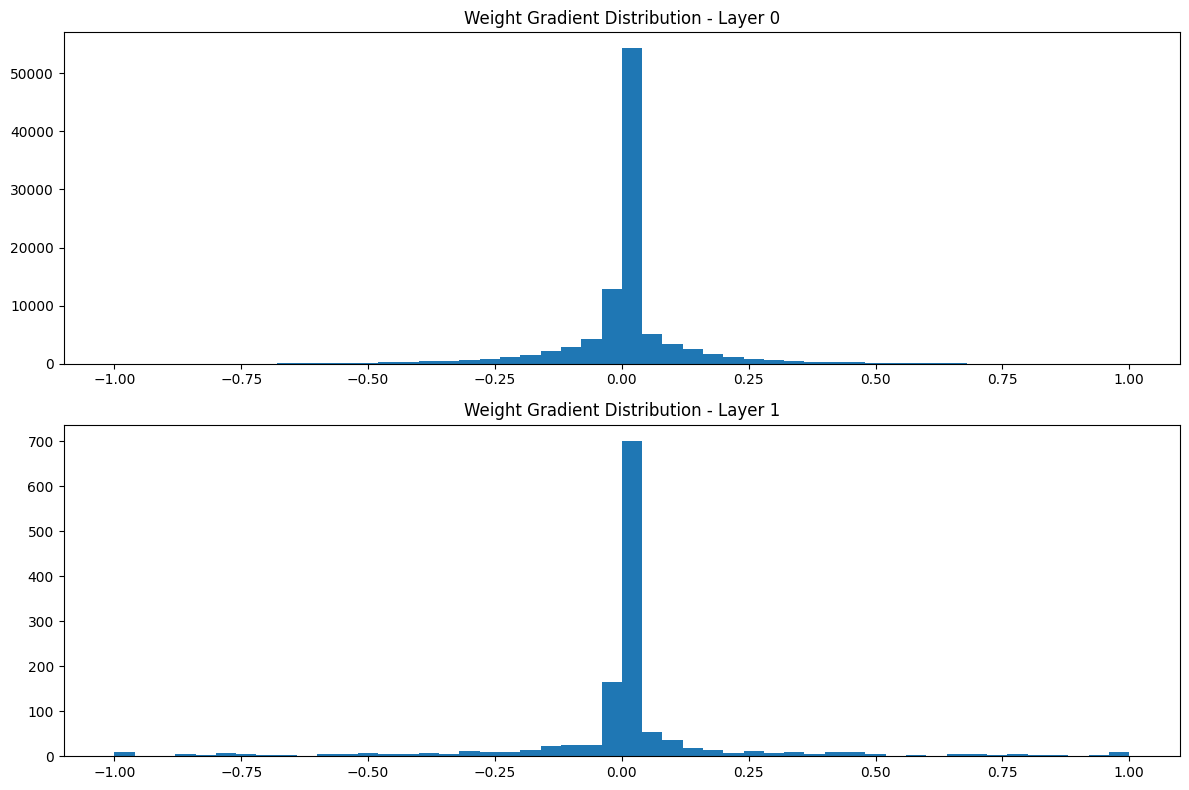


Activation Function: tanh


Epoch 1/10: 100%|██████████| 56000/56000 [00:00<00:00, 129920.41samples/s]


	Train Loss: 0.3278 - Val Loss: 0.2269


Epoch 2/10: 100%|██████████| 56000/56000 [00:00<00:00, 135121.19samples/s]


	Train Loss: 0.1853 - Val Loss: 0.1887


Epoch 3/10: 100%|██████████| 56000/56000 [00:00<00:00, 129305.74samples/s]


	Train Loss: 0.1400 - Val Loss: 0.2042


Epoch 4/10: 100%|██████████| 56000/56000 [00:00<00:00, 135259.54samples/s]


	Train Loss: 0.1148 - Val Loss: 0.1426


Epoch 5/10: 100%|██████████| 56000/56000 [00:00<00:00, 128156.65samples/s]


	Train Loss: 0.0979 - Val Loss: 0.1332


Epoch 6/10: 100%|██████████| 56000/56000 [00:00<00:00, 133770.02samples/s]


	Train Loss: 0.0834 - Val Loss: 0.1192


Epoch 7/10: 100%|██████████| 56000/56000 [00:00<00:00, 131568.39samples/s]


	Train Loss: 0.0710 - Val Loss: 0.1689


Epoch 8/10: 100%|██████████| 56000/56000 [00:00<00:00, 131251.81samples/s]


	Train Loss: 0.0630 - Val Loss: 0.1166


Epoch 9/10: 100%|██████████| 56000/56000 [00:00<00:00, 129325.17samples/s]


	Train Loss: 0.0553 - Val Loss: 0.1257


Epoch 10/10: 100%|██████████| 56000/56000 [00:00<00:00, 130063.50samples/s]


	Train Loss: 0.0485 - Val Loss: 0.1195
Accuracy: 0.9668571428571429


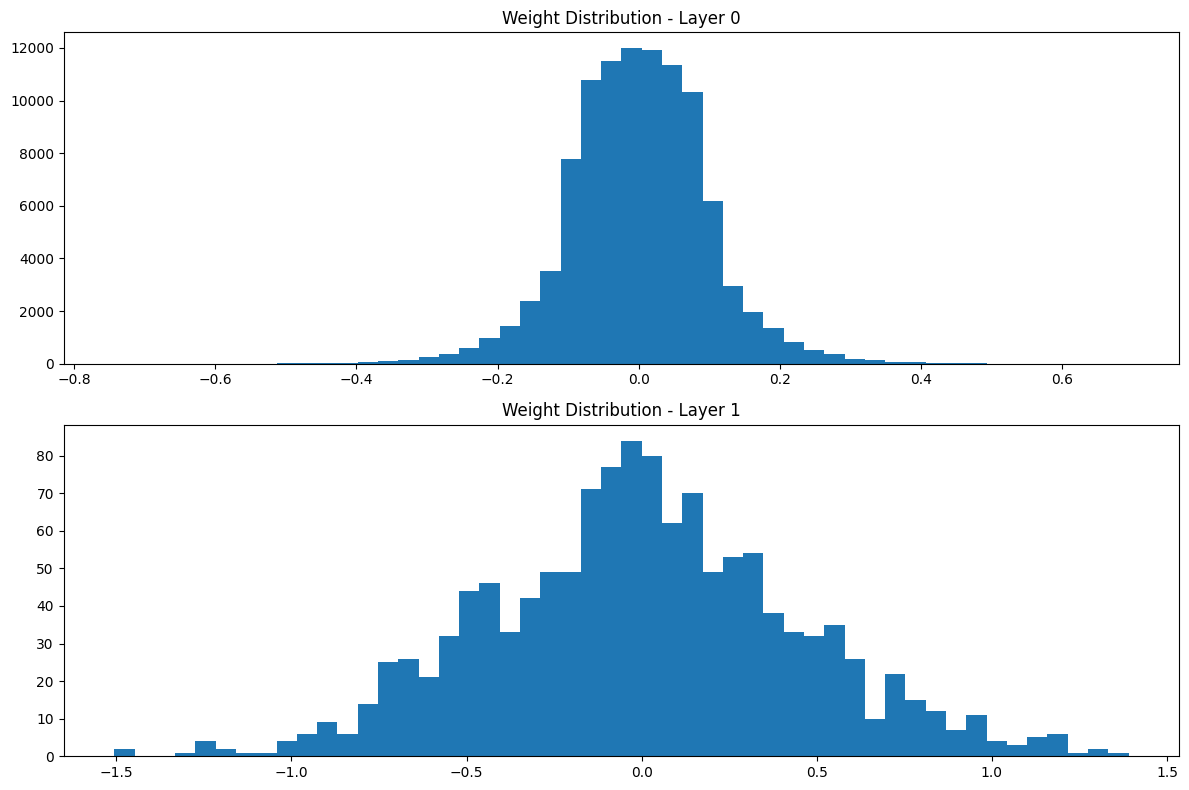

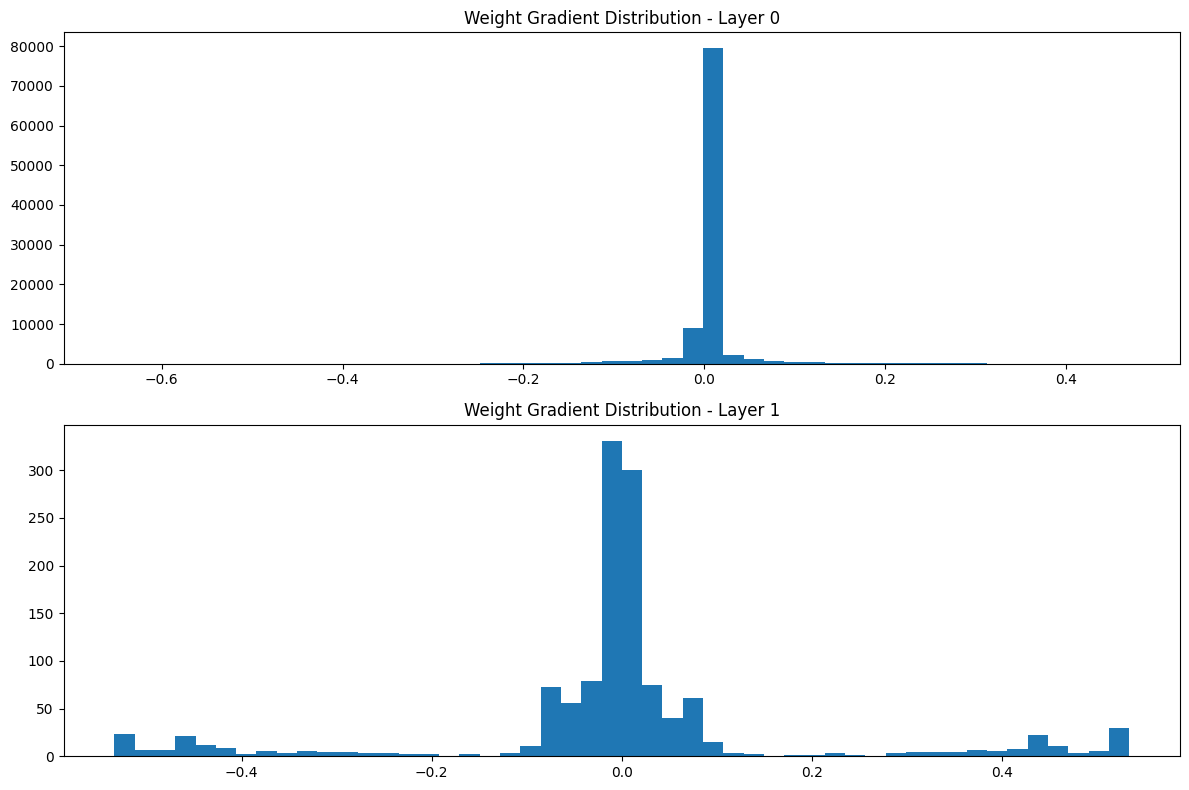


Activation Function: elu


Epoch 1/10: 100%|██████████| 56000/56000 [00:00<00:00, 112612.64samples/s]


	Train Loss: 0.3177 - Val Loss: 0.2036


Epoch 2/10: 100%|██████████| 56000/56000 [00:00<00:00, 115639.94samples/s]


	Train Loss: 0.1645 - Val Loss: 0.1848


Epoch 3/10: 100%|██████████| 56000/56000 [00:00<00:00, 114628.00samples/s]


	Train Loss: 0.1264 - Val Loss: 0.1507


Epoch 4/10: 100%|██████████| 56000/56000 [00:00<00:00, 115561.31samples/s]


	Train Loss: 0.1037 - Val Loss: 0.1323


Epoch 5/10: 100%|██████████| 56000/56000 [00:00<00:00, 116671.99samples/s]


	Train Loss: 0.0868 - Val Loss: 0.1302


Epoch 6/10: 100%|██████████| 56000/56000 [00:00<00:00, 116880.89samples/s]


	Train Loss: 0.0747 - Val Loss: 0.1199


Epoch 7/10: 100%|██████████| 56000/56000 [00:00<00:00, 108598.08samples/s]


	Train Loss: 0.0671 - Val Loss: 0.1313


Epoch 8/10: 100%|██████████| 56000/56000 [00:00<00:00, 117870.74samples/s]


	Train Loss: 0.0581 - Val Loss: 0.1128


Epoch 9/10: 100%|██████████| 56000/56000 [00:00<00:00, 116314.36samples/s]


	Train Loss: 0.0528 - Val Loss: 0.1213


Epoch 10/10: 100%|██████████| 56000/56000 [00:00<00:00, 110817.56samples/s]


	Train Loss: 0.0484 - Val Loss: 0.1500
Accuracy: 0.9639285714285715


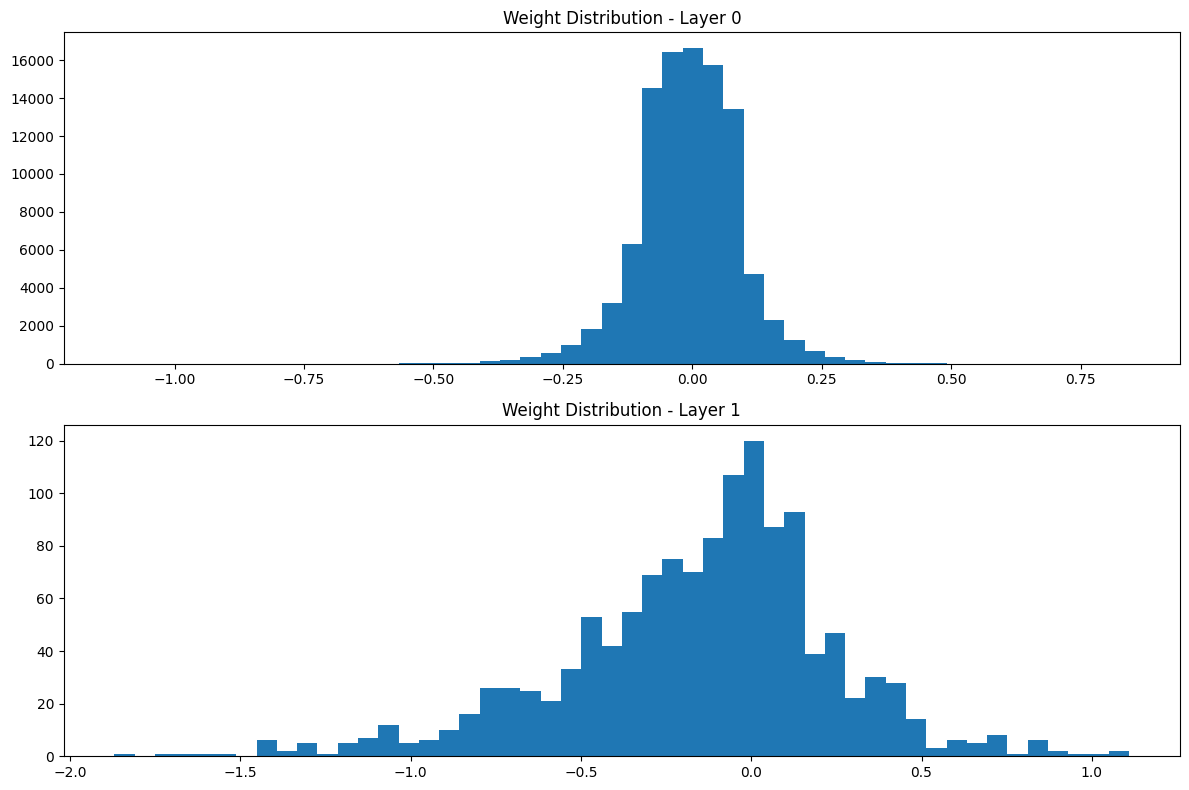

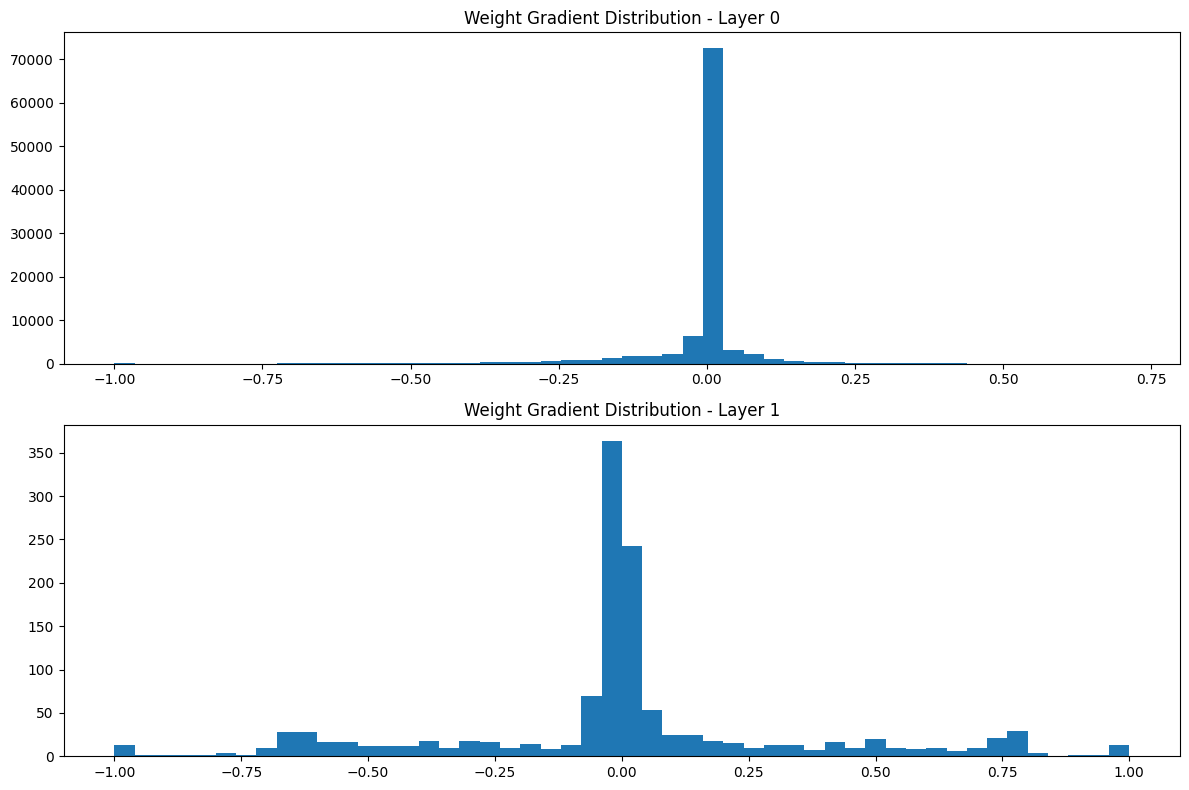


Activation Function: leaky_relu


Epoch 1/10: 100%|██████████| 56000/56000 [00:00<00:00, 130322.57samples/s]


	Train Loss: 0.2583 - Val Loss: 0.1459


Epoch 2/10: 100%|██████████| 56000/56000 [00:00<00:00, 132074.20samples/s]


	Train Loss: 0.1084 - Val Loss: 0.1249


Epoch 3/10: 100%|██████████| 56000/56000 [00:00<00:00, 133790.36samples/s]


	Train Loss: 0.0769 - Val Loss: 0.0935


Epoch 4/10: 100%|██████████| 56000/56000 [00:00<00:00, 136338.61samples/s]


	Train Loss: 0.0602 - Val Loss: 0.0914


Epoch 5/10: 100%|██████████| 56000/56000 [00:00<00:00, 133885.16samples/s]


	Train Loss: 0.0461 - Val Loss: 0.1204


Epoch 6/10: 100%|██████████| 56000/56000 [00:00<00:00, 121686.52samples/s]


	Train Loss: 0.0356 - Val Loss: 0.0991


Epoch 7/10: 100%|██████████| 56000/56000 [00:00<00:00, 133989.56samples/s]


	Train Loss: 0.0275 - Val Loss: 0.1036


Epoch 8/10: 100%|██████████| 56000/56000 [00:00<00:00, 132461.37samples/s]


	Train Loss: 0.0232 - Val Loss: 0.0960


Epoch 9/10: 100%|██████████| 56000/56000 [00:00<00:00, 130803.17samples/s]


	Train Loss: 0.0195 - Val Loss: 0.0959


Epoch 10/10: 100%|██████████| 56000/56000 [00:00<00:00, 143554.43samples/s]


	Train Loss: 0.0141 - Val Loss: 0.0934
Accuracy: 0.9772857142857143


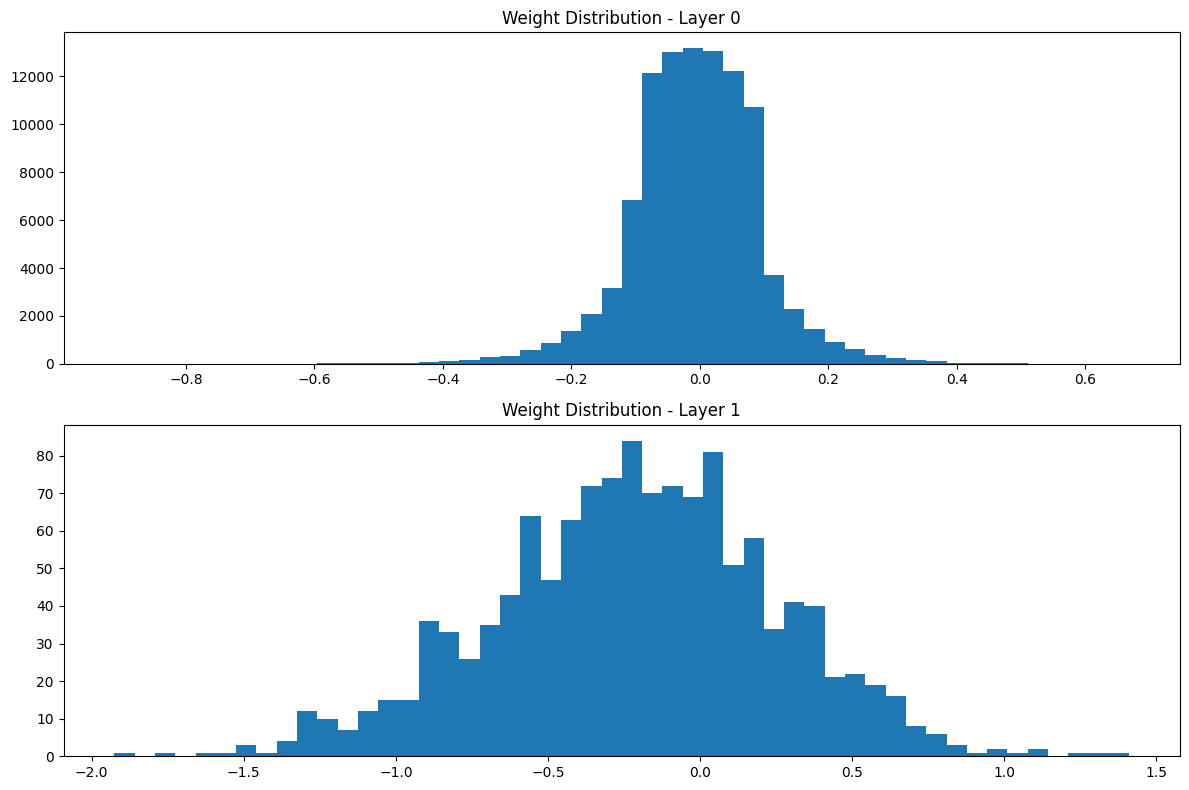

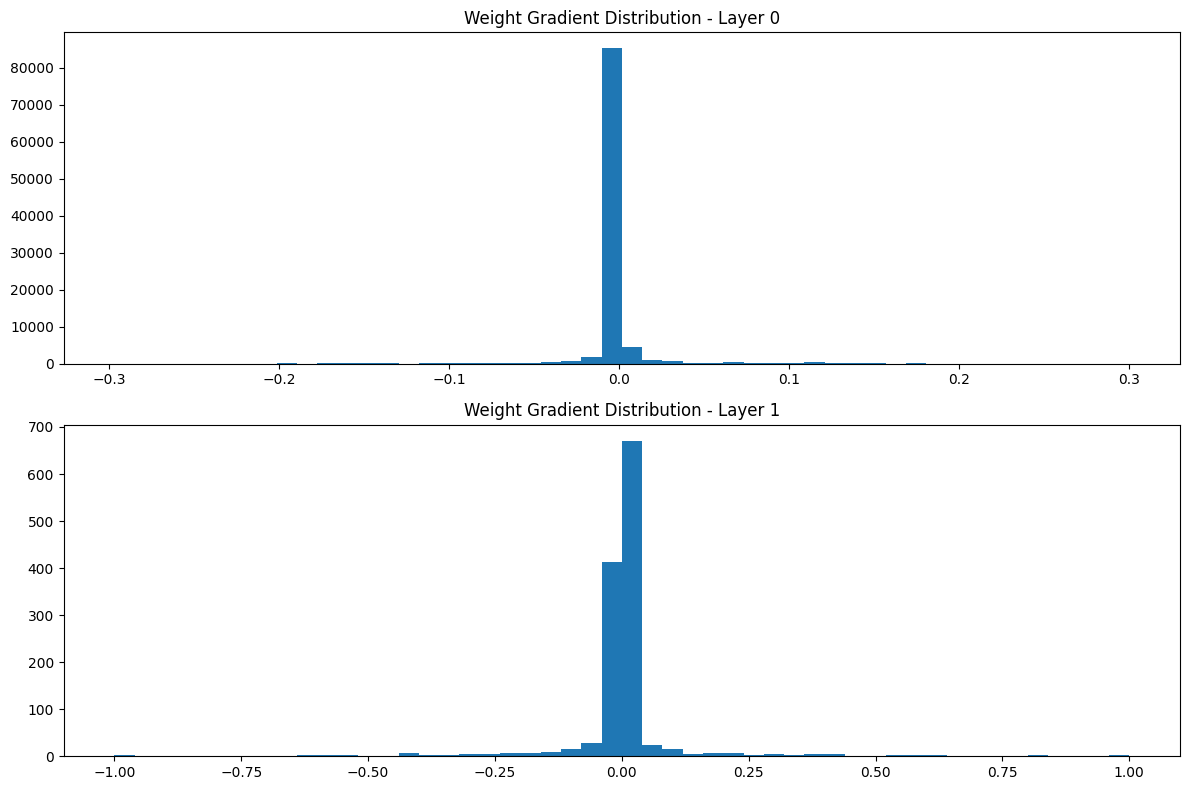

In [5]:
analyze_activation_functions(X_train, X_test, y_train_onehot, y_test_onehot)

### Analyze Learning Rates

Analyzing Learning Rates

Learning Rate: 0.001


Epoch 1/10: 100%|██████████| 56000/56000 [00:00<00:00, 138942.57samples/s]


	Train Loss: 0.5582 - Val Loss: 0.3253


Epoch 2/10: 100%|██████████| 56000/56000 [00:00<00:00, 147946.67samples/s]


	Train Loss: 0.2825 - Val Loss: 0.2589


Epoch 3/10: 100%|██████████| 56000/56000 [00:00<00:00, 151778.79samples/s]


	Train Loss: 0.2288 - Val Loss: 0.2221


Epoch 4/10: 100%|██████████| 56000/56000 [00:00<00:00, 157653.61samples/s]


	Train Loss: 0.1934 - Val Loss: 0.1950


Epoch 5/10: 100%|██████████| 56000/56000 [00:00<00:00, 149461.24samples/s]


	Train Loss: 0.1672 - Val Loss: 0.1757


Epoch 6/10: 100%|██████████| 56000/56000 [00:00<00:00, 119176.32samples/s]


	Train Loss: 0.1471 - Val Loss: 0.1595


Epoch 7/10: 100%|██████████| 56000/56000 [00:00<00:00, 151560.59samples/s]


	Train Loss: 0.1312 - Val Loss: 0.1511


Epoch 8/10: 100%|██████████| 56000/56000 [00:00<00:00, 155527.89samples/s]


	Train Loss: 0.1183 - Val Loss: 0.1419


Epoch 9/10: 100%|██████████| 56000/56000 [00:00<00:00, 143029.40samples/s]


	Train Loss: 0.1076 - Val Loss: 0.1343


Epoch 10/10: 100%|██████████| 56000/56000 [00:00<00:00, 153224.88samples/s]


	Train Loss: 0.0983 - Val Loss: 0.1260
Accuracy: 0.9634285714285714


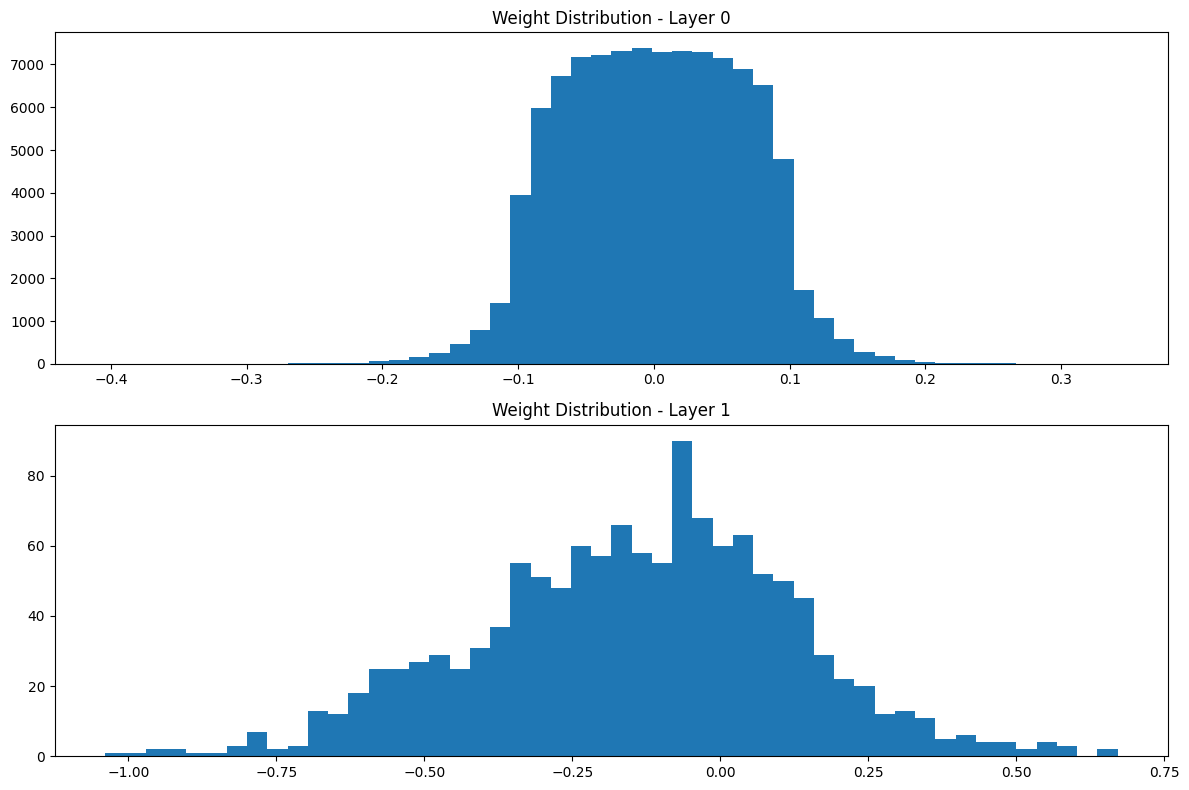

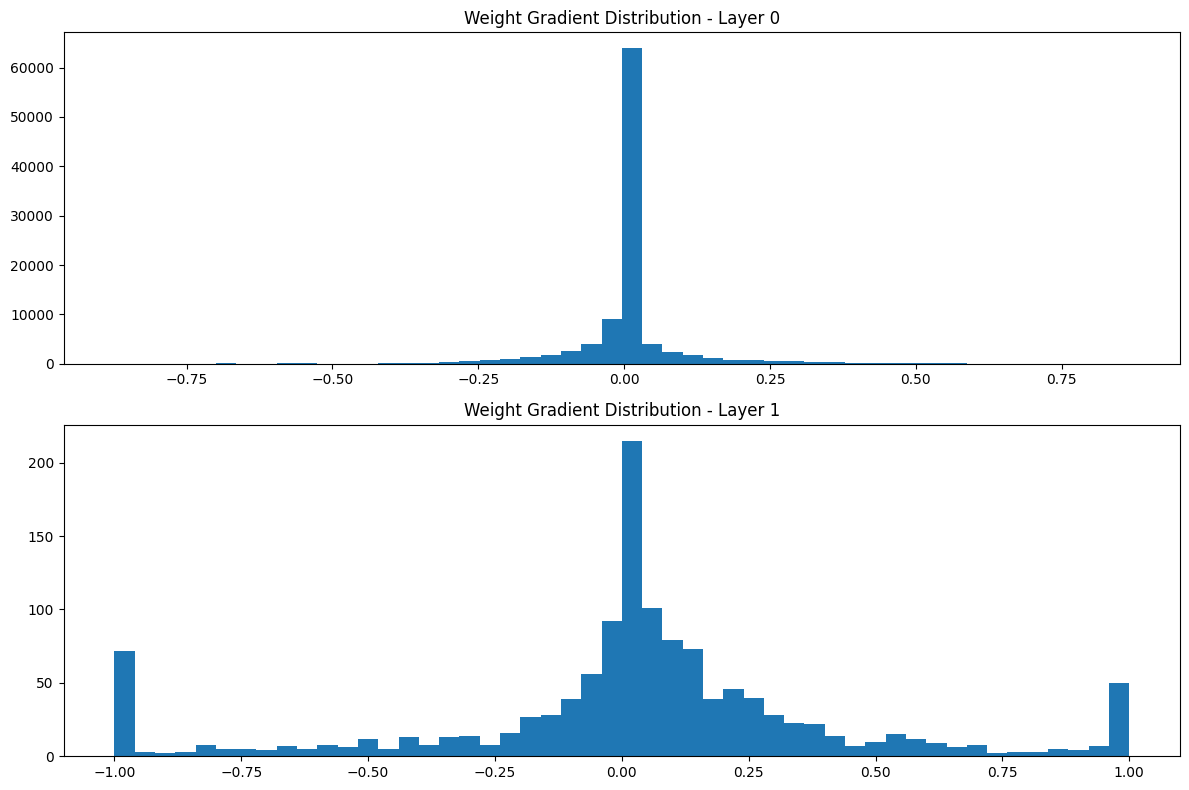


Learning Rate: 0.01


Epoch 1/10: 100%|██████████| 56000/56000 [00:00<00:00, 128498.16samples/s]


	Train Loss: 0.2542 - Val Loss: 0.1664


Epoch 2/10: 100%|██████████| 56000/56000 [00:00<00:00, 127507.76samples/s]


	Train Loss: 0.1086 - Val Loss: 0.1349


Epoch 3/10: 100%|██████████| 56000/56000 [00:00<00:00, 134117.87samples/s]


	Train Loss: 0.0793 - Val Loss: 0.1049


Epoch 4/10: 100%|██████████| 56000/56000 [00:00<00:00, 129305.52samples/s]


	Train Loss: 0.0609 - Val Loss: 0.1036


Epoch 5/10: 100%|██████████| 56000/56000 [00:00<00:00, 124559.86samples/s]


	Train Loss: 0.0467 - Val Loss: 0.0994


Epoch 6/10: 100%|██████████| 56000/56000 [00:00<00:00, 134337.33samples/s]


	Train Loss: 0.0377 - Val Loss: 0.0944


Epoch 7/10: 100%|██████████| 56000/56000 [00:00<00:00, 127251.34samples/s]


	Train Loss: 0.0297 - Val Loss: 0.1088


Epoch 8/10: 100%|██████████| 56000/56000 [00:00<00:00, 132636.92samples/s]


	Train Loss: 0.0237 - Val Loss: 0.0990


Epoch 9/10: 100%|██████████| 56000/56000 [00:00<00:00, 122020.87samples/s]


	Train Loss: 0.0178 - Val Loss: 0.0920


Epoch 10/10: 100%|██████████| 56000/56000 [00:00<00:00, 120747.11samples/s]


	Train Loss: 0.0151 - Val Loss: 0.0888
Accuracy: 0.9785


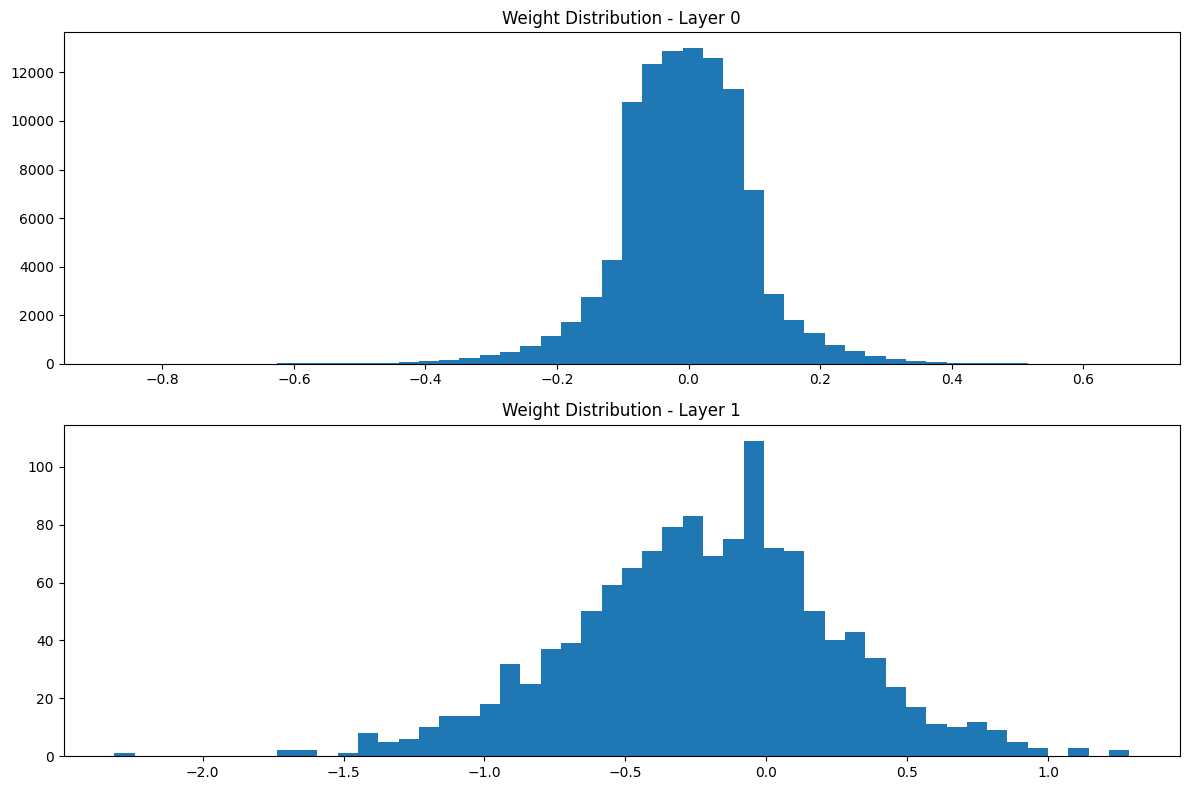

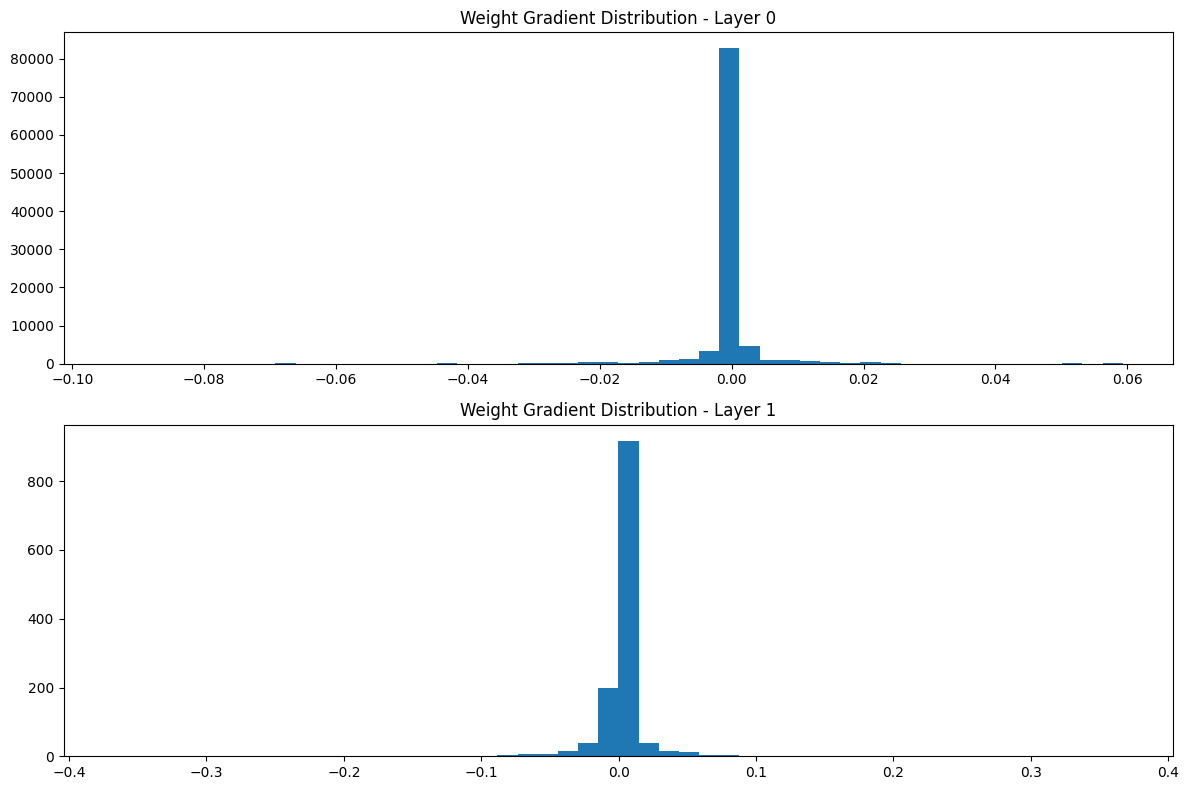


Learning Rate: 0.1


Epoch 1/10: 100%|██████████| 56000/56000 [00:00<00:00, 120620.49samples/s]


	Train Loss: 0.7667 - Val Loss: 0.6121


Epoch 2/10: 100%|██████████| 56000/56000 [00:00<00:00, 135894.98samples/s]


	Train Loss: 0.5312 - Val Loss: 0.4663


Epoch 3/10: 100%|██████████| 56000/56000 [00:00<00:00, 128630.74samples/s]


	Train Loss: 0.4860 - Val Loss: 0.4975


Epoch 4/10: 100%|██████████| 56000/56000 [00:00<00:00, 131145.99samples/s]


	Train Loss: 0.4407 - Val Loss: 0.4706


Epoch 5/10: 100%|██████████| 56000/56000 [00:00<00:00, 134731.09samples/s]


	Train Loss: 0.4159 - Val Loss: 0.4827


Epoch 6/10: 100%|██████████| 56000/56000 [00:00<00:00, 128904.58samples/s]


	Train Loss: 0.3958 - Val Loss: 0.4638


Epoch 7/10: 100%|██████████| 56000/56000 [00:00<00:00, 121954.92samples/s]


	Train Loss: 0.3610 - Val Loss: 0.4620


Epoch 8/10: 100%|██████████| 56000/56000 [00:00<00:00, 139219.36samples/s]


	Train Loss: 0.3535 - Val Loss: 0.4480


Epoch 9/10: 100%|██████████| 56000/56000 [00:00<00:00, 121404.49samples/s]


	Train Loss: 0.3430 - Val Loss: 0.4463


Epoch 10/10: 100%|██████████| 56000/56000 [00:00<00:00, 132301.40samples/s]


	Train Loss: 0.3201 - Val Loss: 0.4854
Accuracy: 0.9286428571428571


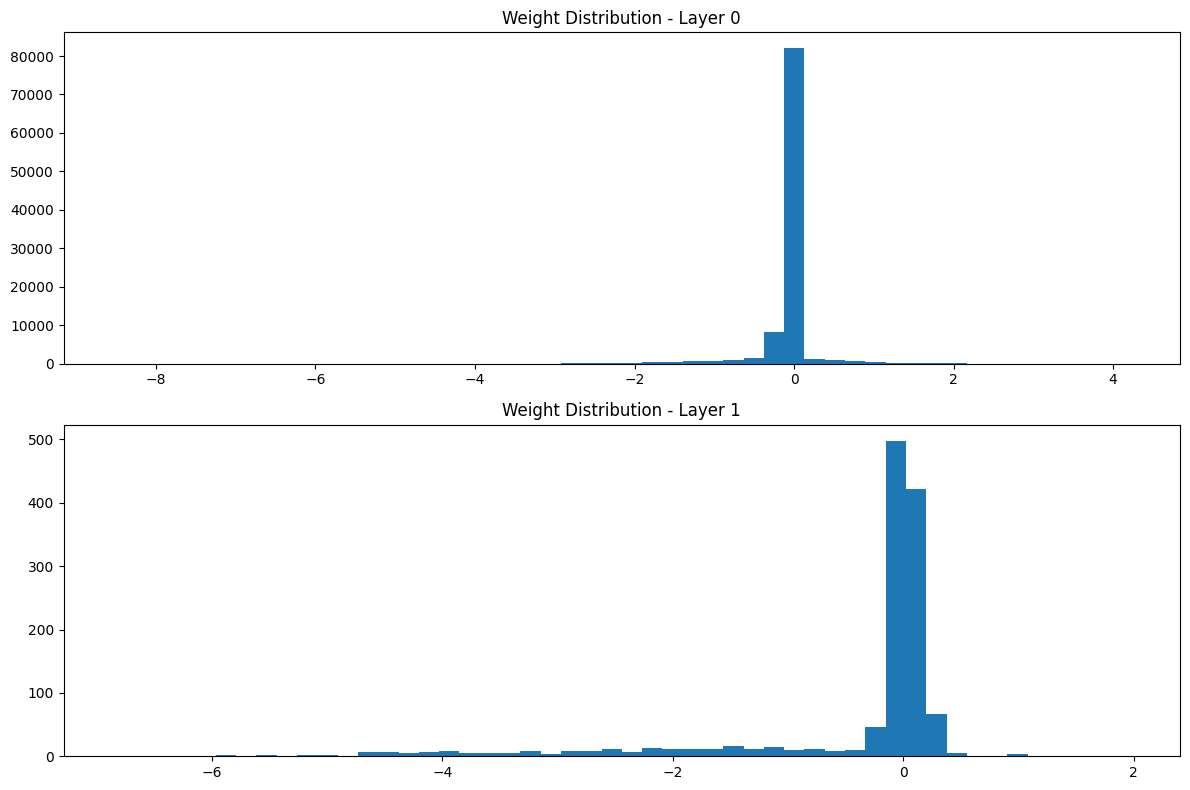

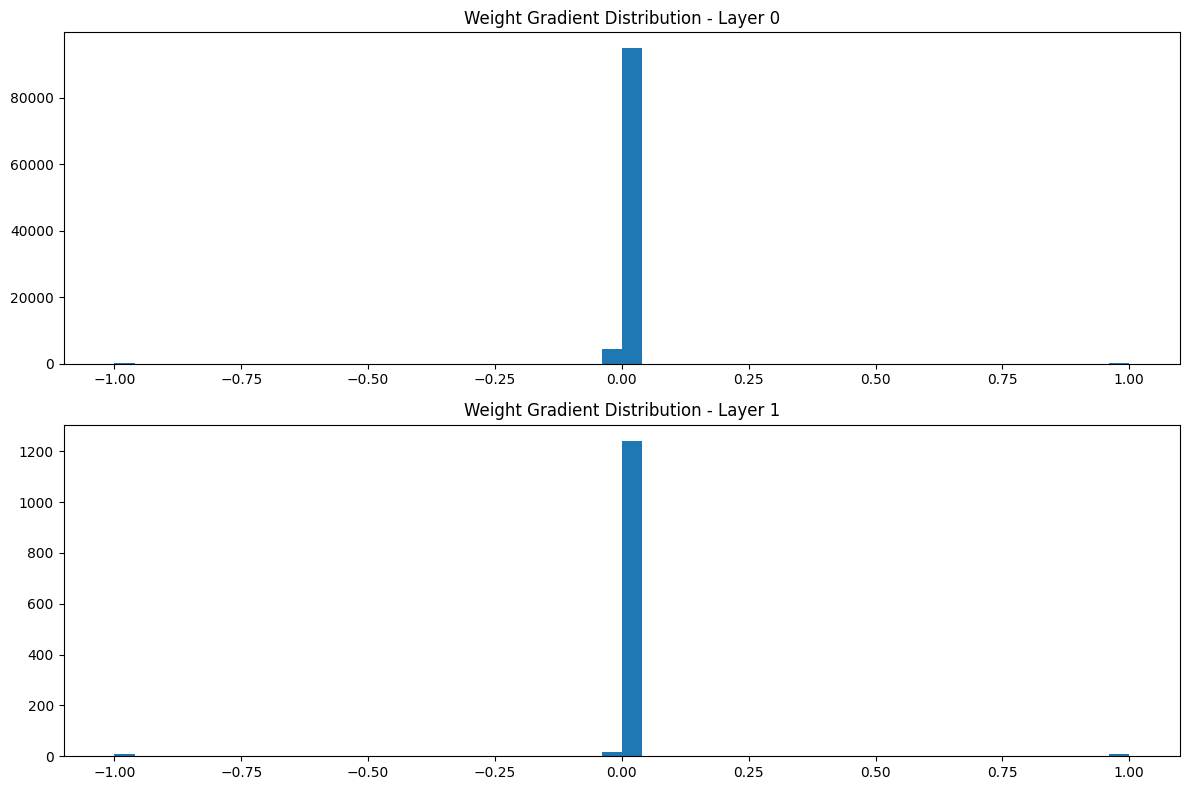

In [6]:
analyze_learning_rates(X_train, X_test, y_train_onehot, y_test_onehot)

### Analyze Weight Initialization

Analyzing Weight Initialization

Initialization Method: zero


Epoch 1/10: 100%|██████████| 56000/56000 [00:00<00:00, 114011.17samples/s]


	Train Loss: 2.3022 - Val Loss: 2.3011


Epoch 2/10: 100%|██████████| 56000/56000 [00:00<00:00, 130105.21samples/s]


	Train Loss: 2.3023 - Val Loss: 2.3016


Epoch 3/10: 100%|██████████| 56000/56000 [00:00<00:00, 130983.19samples/s]


	Train Loss: 2.3022 - Val Loss: 2.3016


Epoch 4/10: 100%|██████████| 56000/56000 [00:00<00:00, 129947.29samples/s]


	Train Loss: 2.3024 - Val Loss: 2.3015


Epoch 5/10: 100%|██████████| 56000/56000 [00:00<00:00, 130013.97samples/s]


	Train Loss: 2.3023 - Val Loss: 2.3013


Epoch 6/10: 100%|██████████| 56000/56000 [00:00<00:00, 121672.21samples/s]


	Train Loss: 2.3024 - Val Loss: 2.3016


Epoch 7/10: 100%|██████████| 56000/56000 [00:00<00:00, 134422.13samples/s]


	Train Loss: 2.3023 - Val Loss: 2.3015


Epoch 8/10: 100%|██████████| 56000/56000 [00:00<00:00, 127513.57samples/s]


	Train Loss: 2.3024 - Val Loss: 2.3016


Epoch 9/10: 100%|██████████| 56000/56000 [00:00<00:00, 124475.43samples/s]


	Train Loss: 2.3024 - Val Loss: 2.3019


Epoch 10/10: 100%|██████████| 56000/56000 [00:00<00:00, 132516.82samples/s]


	Train Loss: 2.3022 - Val Loss: 2.3025
Accuracy: 0.10735714285714286


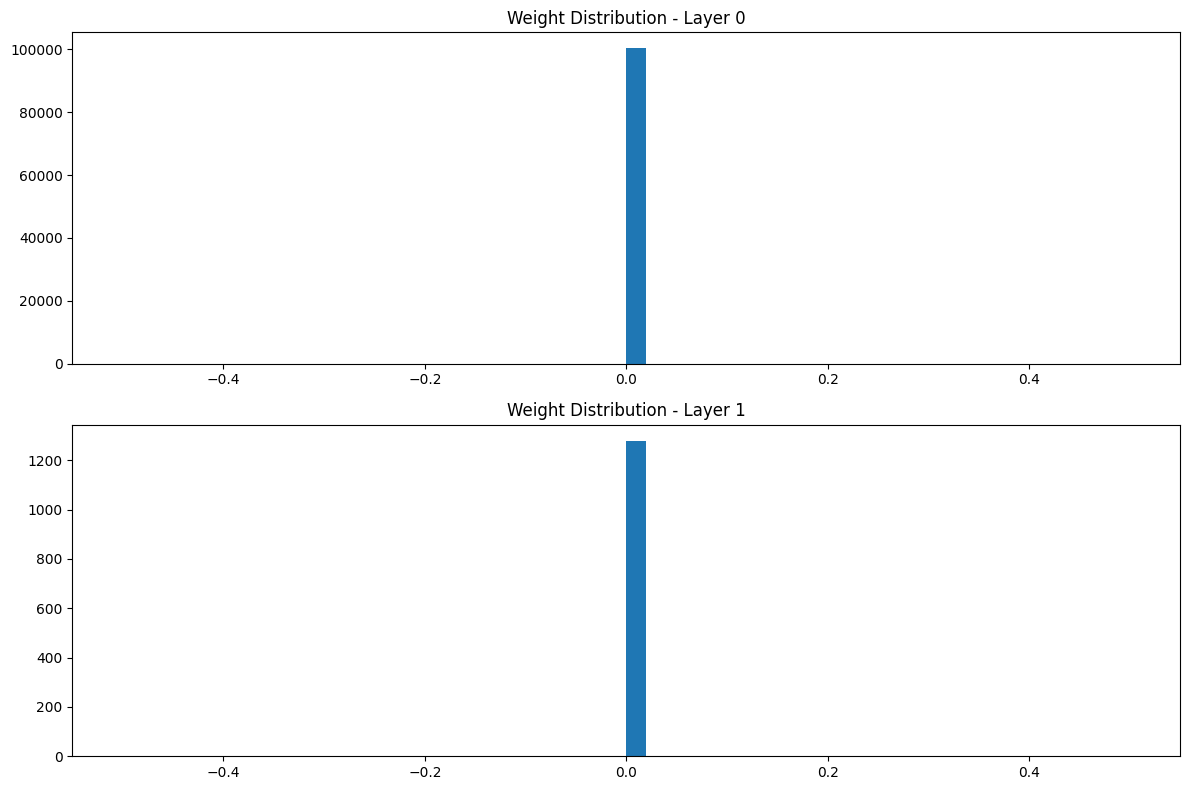

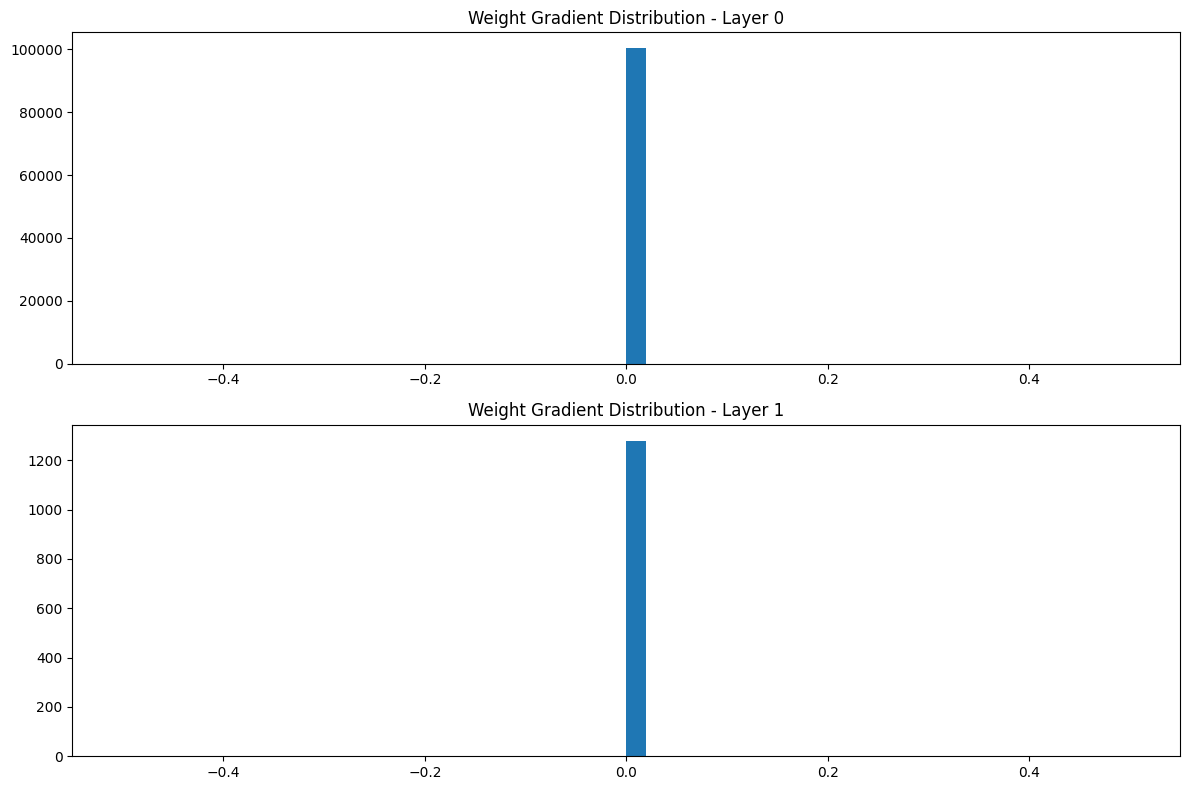


Initialization Method: uniform


Epoch 1/10: 100%|██████████| 56000/56000 [00:00<00:00, 122189.91samples/s]


	Train Loss: 0.2537 - Val Loss: 0.1319


Epoch 2/10: 100%|██████████| 56000/56000 [00:00<00:00, 137264.05samples/s]


	Train Loss: 0.1078 - Val Loss: 0.1069


Epoch 3/10: 100%|██████████| 56000/56000 [00:00<00:00, 132131.26samples/s]


	Train Loss: 0.0764 - Val Loss: 0.0981


Epoch 4/10: 100%|██████████| 56000/56000 [00:00<00:00, 131346.27samples/s]


	Train Loss: 0.0581 - Val Loss: 0.0932


Epoch 5/10: 100%|██████████| 56000/56000 [00:00<00:00, 130550.74samples/s]


	Train Loss: 0.0471 - Val Loss: 0.0865


Epoch 6/10: 100%|██████████| 56000/56000 [00:00<00:00, 124986.58samples/s]


	Train Loss: 0.0371 - Val Loss: 0.0975


Epoch 7/10: 100%|██████████| 56000/56000 [00:00<00:00, 123927.76samples/s]


	Train Loss: 0.0313 - Val Loss: 0.0913


Epoch 8/10: 100%|██████████| 56000/56000 [00:00<00:00, 121567.36samples/s]


	Train Loss: 0.0232 - Val Loss: 0.0939


Epoch 9/10: 100%|██████████| 56000/56000 [00:00<00:00, 132176.84samples/s]


	Train Loss: 0.0175 - Val Loss: 0.0938


Epoch 10/10: 100%|██████████| 56000/56000 [00:00<00:00, 121544.08samples/s]


	Train Loss: 0.0142 - Val Loss: 0.0890
Accuracy: 0.9763571428571428


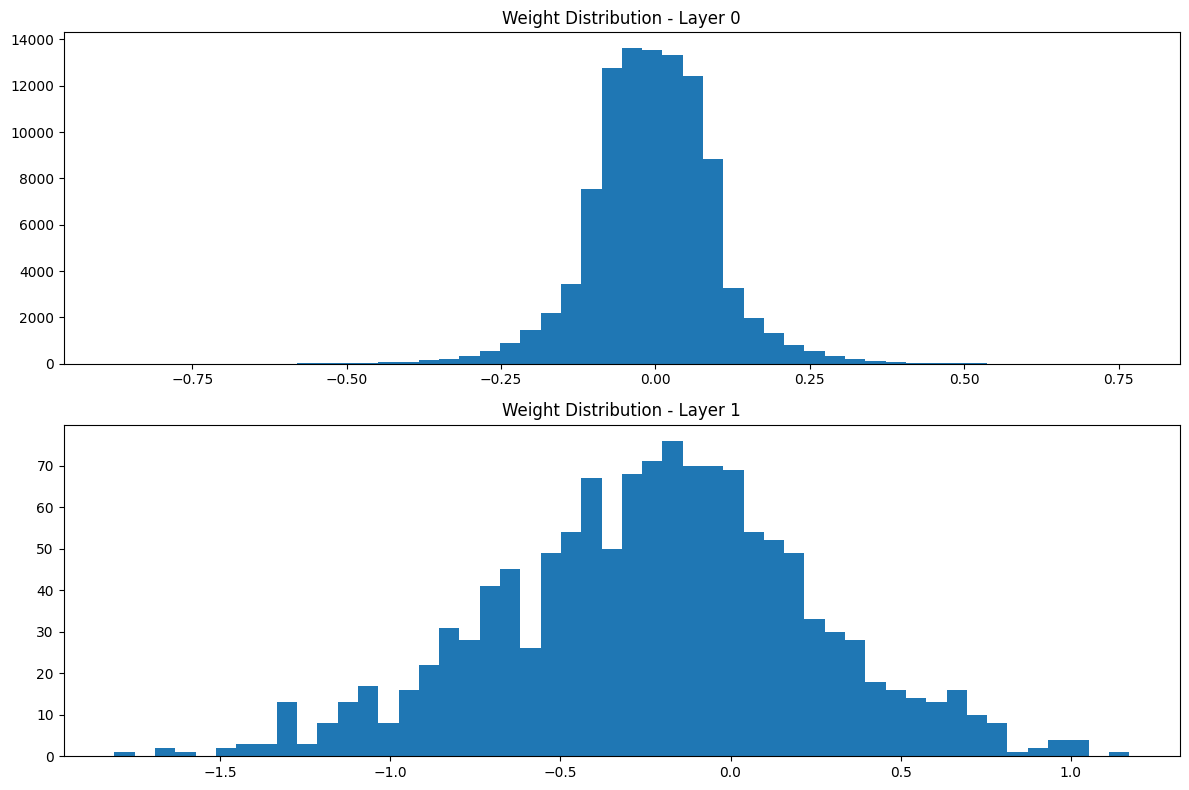

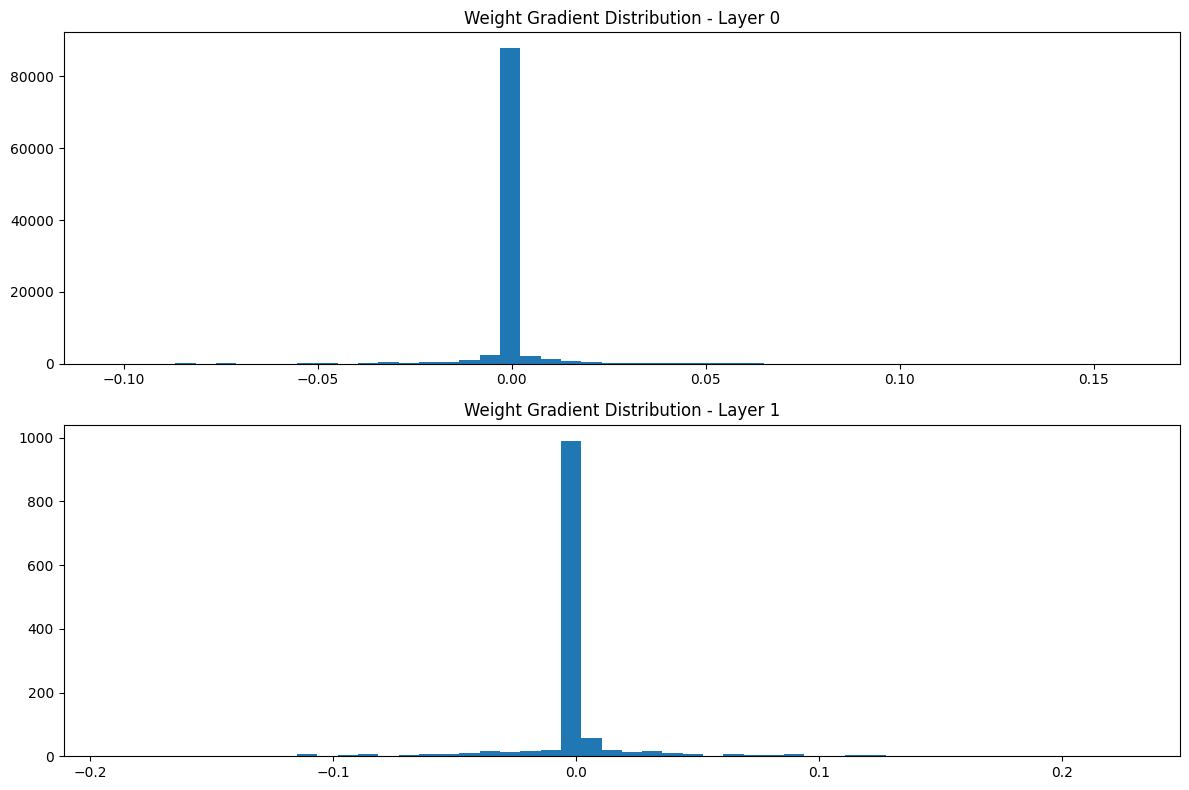


Initialization Method: normal


Epoch 1/10: 100%|██████████| 56000/56000 [00:00<00:00, 131330.19samples/s]


	Train Loss: 0.2917 - Val Loss: 0.1378


Epoch 2/10: 100%|██████████| 56000/56000 [00:00<00:00, 129182.92samples/s]


	Train Loss: 0.1100 - Val Loss: 0.1165


Epoch 3/10: 100%|██████████| 56000/56000 [00:00<00:00, 131908.80samples/s]


	Train Loss: 0.0746 - Val Loss: 0.1055


Epoch 4/10: 100%|██████████| 56000/56000 [00:00<00:00, 147020.62samples/s]


	Train Loss: 0.0578 - Val Loss: 0.0952


Epoch 5/10: 100%|██████████| 56000/56000 [00:00<00:00, 128068.81samples/s]


	Train Loss: 0.0465 - Val Loss: 0.0901


Epoch 6/10: 100%|██████████| 56000/56000 [00:00<00:00, 132277.93samples/s]


	Train Loss: 0.0355 - Val Loss: 0.0897


Epoch 7/10: 100%|██████████| 56000/56000 [00:00<00:00, 131346.57samples/s]


	Train Loss: 0.0279 - Val Loss: 0.0832


Epoch 8/10: 100%|██████████| 56000/56000 [00:00<00:00, 139179.93samples/s]


	Train Loss: 0.0215 - Val Loss: 0.0831


Epoch 9/10: 100%|██████████| 56000/56000 [00:00<00:00, 130172.56samples/s]


	Train Loss: 0.0165 - Val Loss: 0.0943


Epoch 10/10: 100%|██████████| 56000/56000 [00:00<00:00, 133854.33samples/s]


	Train Loss: 0.0128 - Val Loss: 0.0870
Accuracy: 0.977


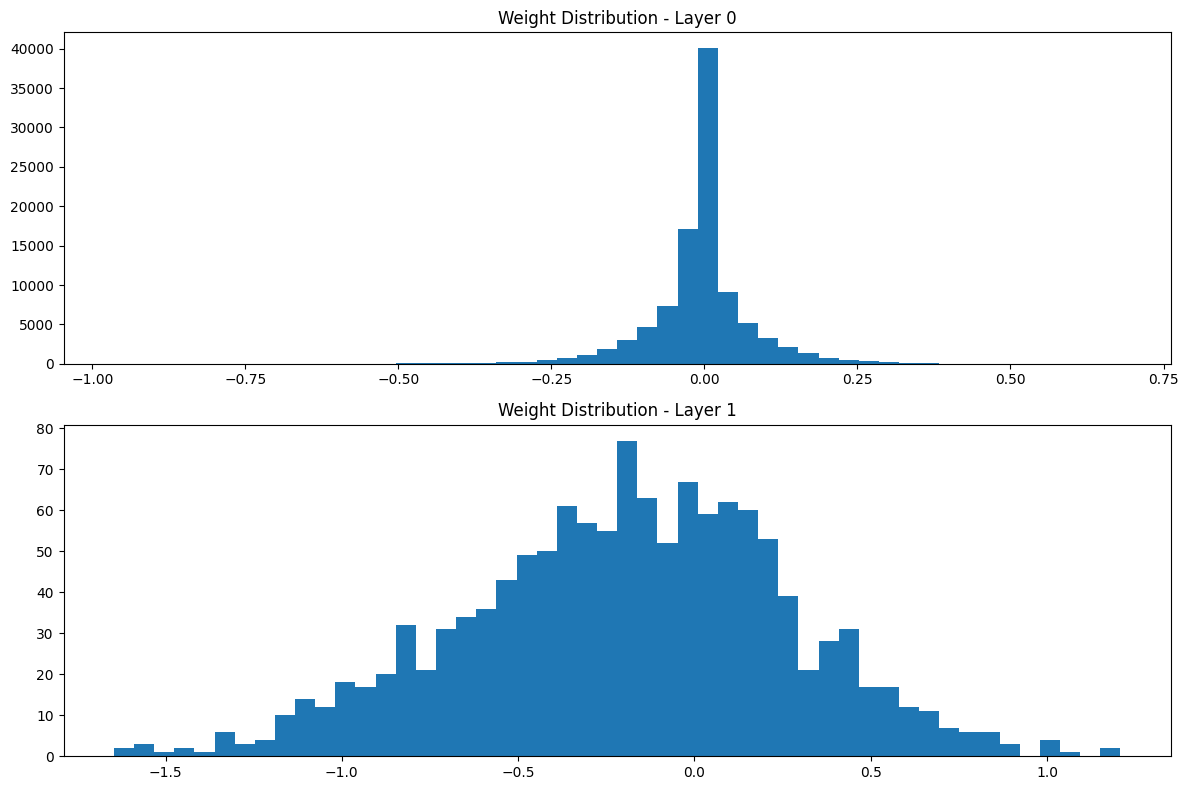

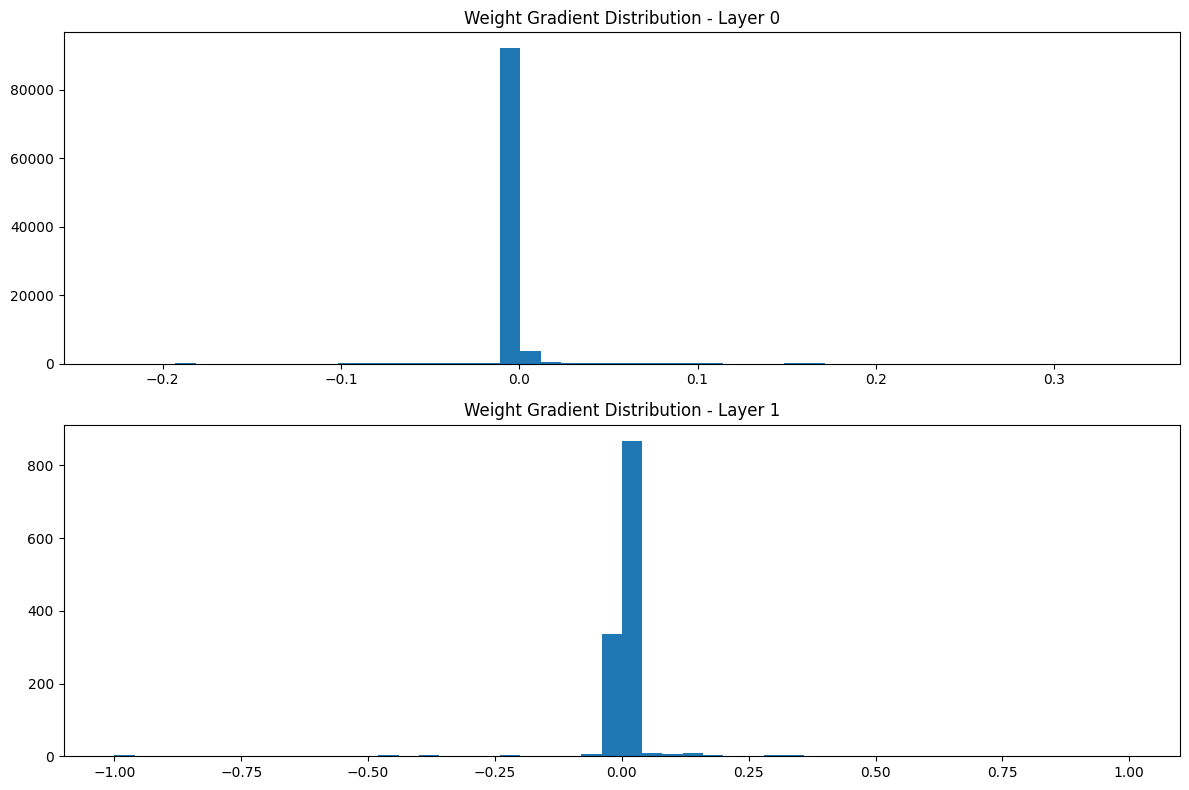


Initialization Method: he


Epoch 1/10: 100%|██████████| 56000/56000 [00:00<00:00, 130375.02samples/s]


	Train Loss: 0.2439 - Val Loss: 0.1465


Epoch 2/10: 100%|██████████| 56000/56000 [00:00<00:00, 133342.17samples/s]


	Train Loss: 0.1105 - Val Loss: 0.1188


Epoch 3/10: 100%|██████████| 56000/56000 [00:00<00:00, 107599.02samples/s]


	Train Loss: 0.0762 - Val Loss: 0.1258


Epoch 4/10: 100%|██████████| 56000/56000 [00:00<00:00, 127002.26samples/s]


	Train Loss: 0.0612 - Val Loss: 0.0986


Epoch 5/10: 100%|██████████| 56000/56000 [00:00<00:00, 84094.94samples/s] 


	Train Loss: 0.0460 - Val Loss: 0.0883


Epoch 6/10: 100%|██████████| 56000/56000 [00:00<00:00, 128401.23samples/s]


	Train Loss: 0.0372 - Val Loss: 0.1065


Epoch 7/10: 100%|██████████| 56000/56000 [00:00<00:00, 122764.18samples/s]


	Train Loss: 0.0282 - Val Loss: 0.0836


Epoch 8/10: 100%|██████████| 56000/56000 [00:00<00:00, 127488.52samples/s]


	Train Loss: 0.0224 - Val Loss: 0.0870


Epoch 9/10: 100%|██████████| 56000/56000 [00:00<00:00, 120883.58samples/s]


	Train Loss: 0.0172 - Val Loss: 0.0862


Epoch 10/10: 100%|██████████| 56000/56000 [00:00<00:00, 128161.69samples/s]


	Train Loss: 0.0133 - Val Loss: 0.0833
Accuracy: 0.9783571428571428


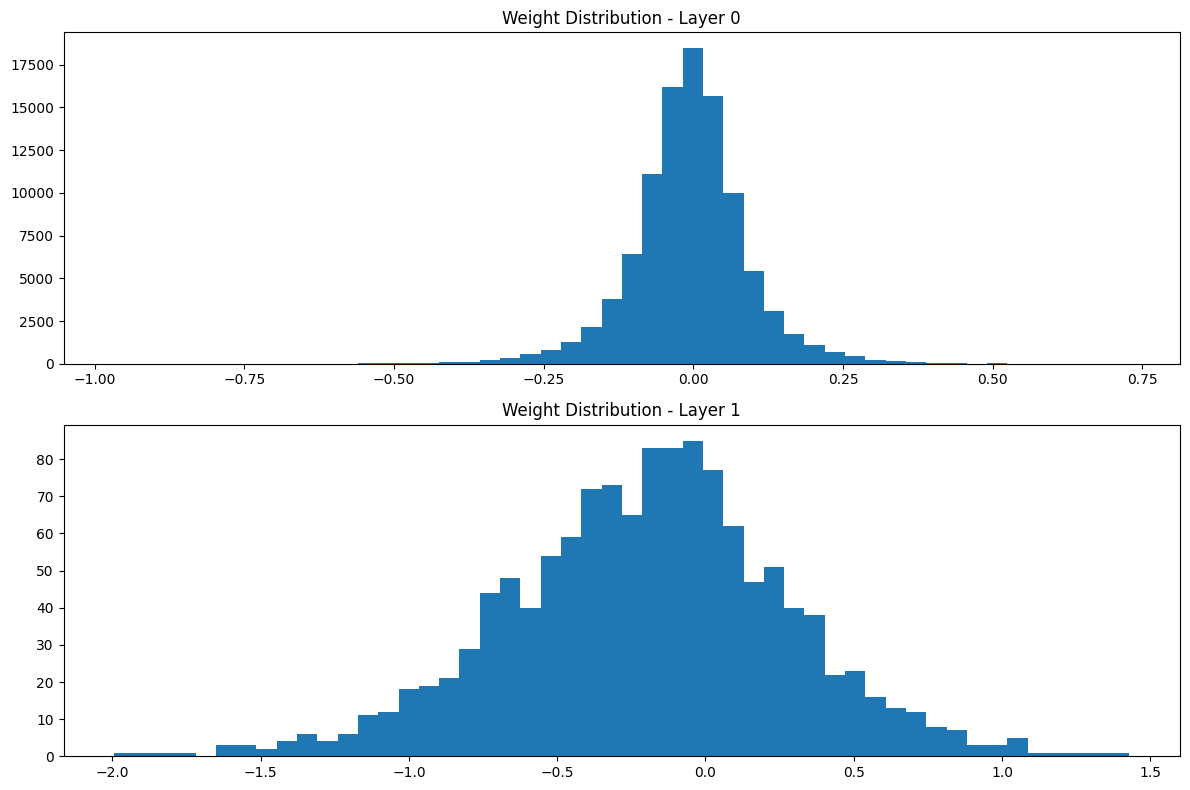

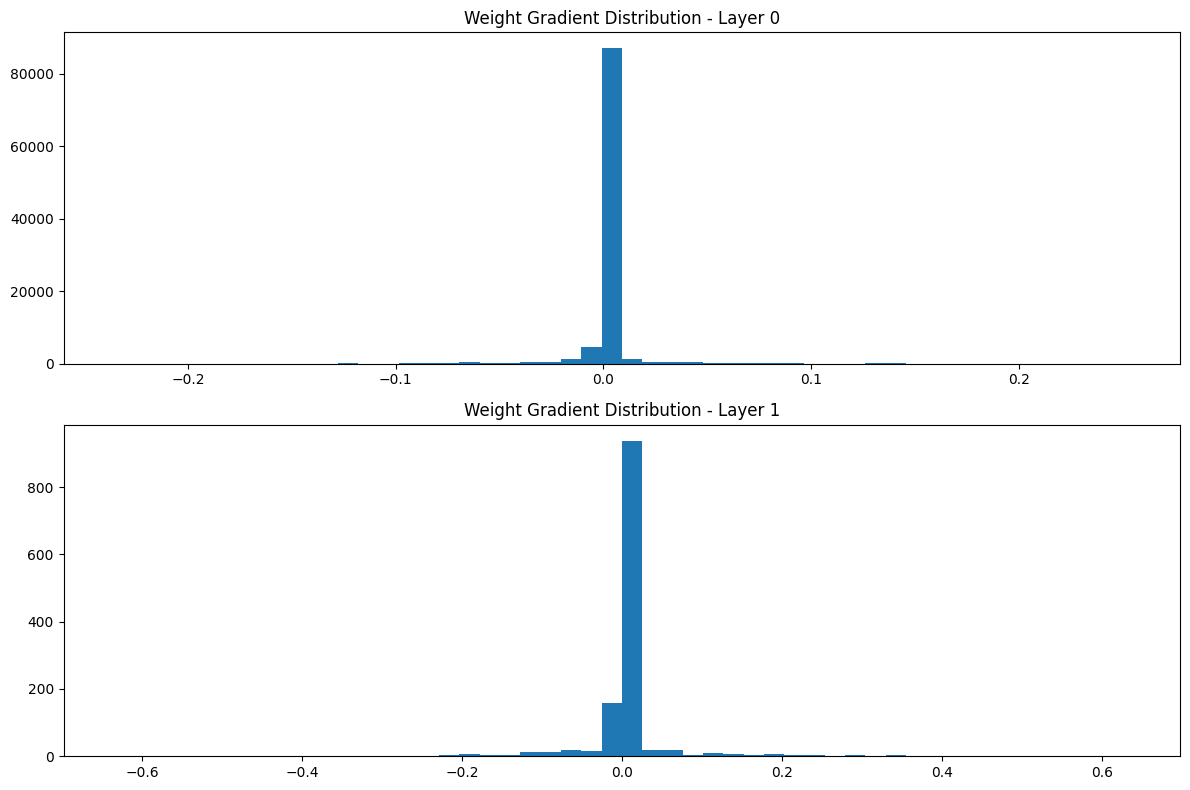


Initialization Method: xavier


Epoch 1/10: 100%|██████████| 56000/56000 [00:00<00:00, 130713.70samples/s]


	Train Loss: 0.2364 - Val Loss: 0.1474


Epoch 2/10: 100%|██████████| 56000/56000 [00:00<00:00, 139140.44samples/s]


	Train Loss: 0.1069 - Val Loss: 0.1342


Epoch 3/10: 100%|██████████| 56000/56000 [00:00<00:00, 139146.04samples/s]


	Train Loss: 0.0759 - Val Loss: 0.1037


Epoch 4/10: 100%|██████████| 56000/56000 [00:00<00:00, 106538.63samples/s]


	Train Loss: 0.0616 - Val Loss: 0.1054


Epoch 5/10: 100%|██████████| 56000/56000 [00:00<00:00, 131617.94samples/s]


	Train Loss: 0.0472 - Val Loss: 0.0947


Epoch 6/10: 100%|██████████| 56000/56000 [00:00<00:00, 128287.33samples/s]


	Train Loss: 0.0390 - Val Loss: 0.1135


Epoch 7/10: 100%|██████████| 56000/56000 [00:00<00:00, 128096.05samples/s]


	Train Loss: 0.0310 - Val Loss: 0.1056


Epoch 8/10: 100%|██████████| 56000/56000 [00:00<00:00, 127674.66samples/s]


	Train Loss: 0.0242 - Val Loss: 0.0945


Epoch 9/10: 100%|██████████| 56000/56000 [00:00<00:00, 132461.29samples/s]


	Train Loss: 0.0187 - Val Loss: 0.0890


Epoch 10/10: 100%|██████████| 56000/56000 [00:00<00:00, 117676.75samples/s]


	Train Loss: 0.0156 - Val Loss: 0.1008
Accuracy: 0.9735


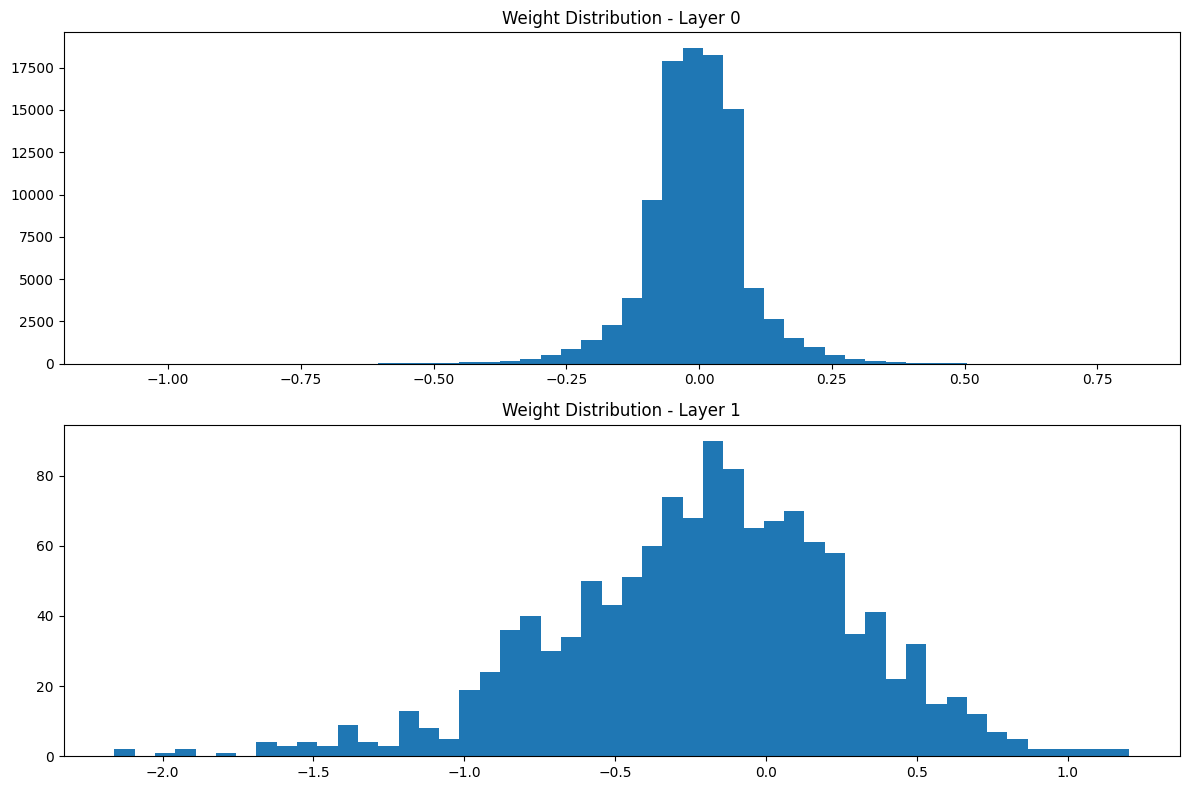

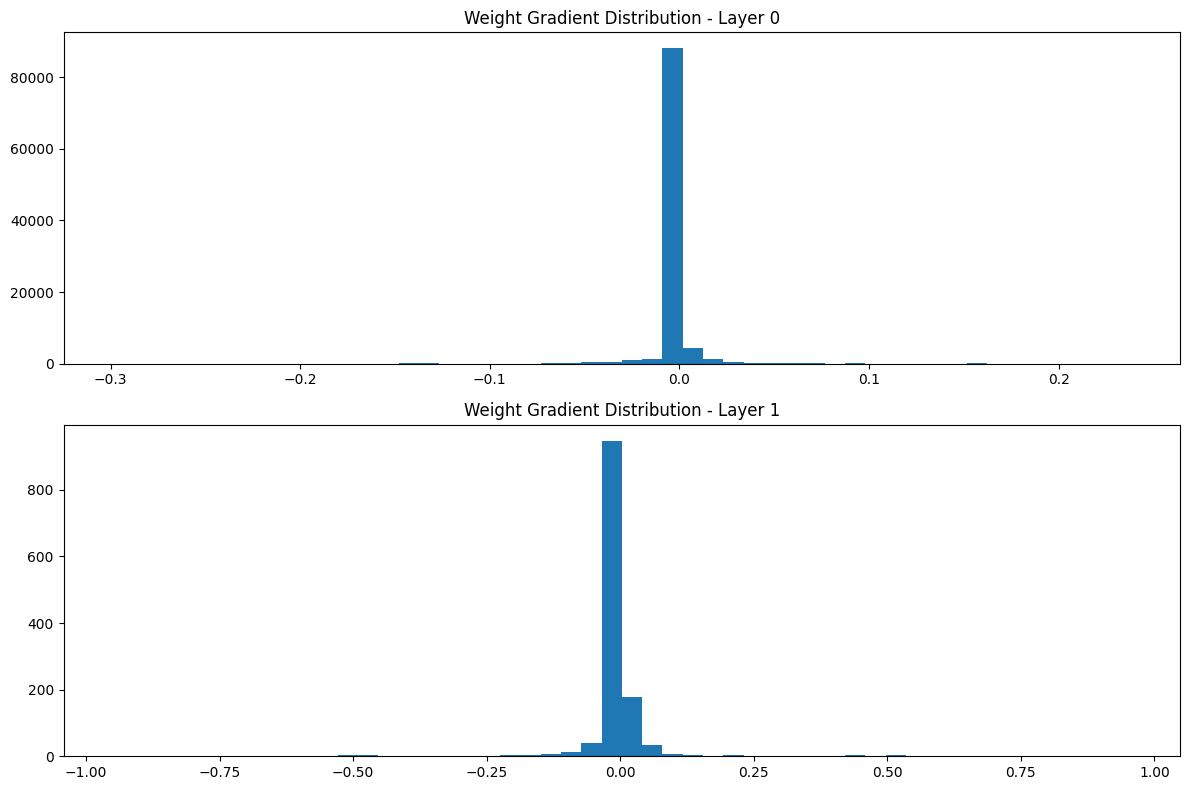

In [7]:
analyze_weight_initialization(X_train, X_test, y_train_onehot, y_test_onehot)

### Analyze Regularization

In [8]:
analyze_regularization(X_train, X_test, y_train_onehot, y_test_onehot)

Analyzing Regularization

Tanpa Regularisasi


Epoch 1/10: 100%|██████████| 56000/56000 [00:00<00:00, 129145.34samples/s]


	Train Loss: 0.2530 - Val Loss: 0.1537


Epoch 2/10: 100%|██████████| 56000/56000 [00:00<00:00, 125366.83samples/s]


	Train Loss: 0.1049 - Val Loss: 0.1118


Epoch 3/10: 100%|██████████| 56000/56000 [00:00<00:00, 122278.97samples/s]


	Train Loss: 0.0739 - Val Loss: 0.1100


Epoch 4/10: 100%|██████████| 56000/56000 [00:00<00:00, 127890.37samples/s]


	Train Loss: 0.0562 - Val Loss: 0.0963


Epoch 5/10: 100%|██████████| 56000/56000 [00:00<00:00, 119284.23samples/s]


	Train Loss: 0.0446 - Val Loss: 0.1006


Epoch 6/10: 100%|██████████| 56000/56000 [00:00<00:00, 120997.91samples/s]


	Train Loss: 0.0342 - Val Loss: 0.0919


Epoch 7/10: 100%|██████████| 56000/56000 [00:00<00:00, 125605.90samples/s]


	Train Loss: 0.0283 - Val Loss: 0.0995


Epoch 8/10: 100%|██████████| 56000/56000 [00:00<00:00, 130227.12samples/s]


	Train Loss: 0.0216 - Val Loss: 0.0892


Epoch 9/10: 100%|██████████| 56000/56000 [00:00<00:00, 127744.51samples/s]


	Train Loss: 0.0164 - Val Loss: 0.1001


Epoch 10/10: 100%|██████████| 56000/56000 [00:00<00:00, 134581.41samples/s]


	Train Loss: 0.0115 - Val Loss: 0.0908
Accuracy: 0.9767857142857143

Dengan Regularisasi L1


Epoch 1/10: 100%|██████████| 56000/56000 [00:00<00:00, 57551.12samples/s]


	Train Loss: 5.5939 - Val Loss: 5.4597


Epoch 2/10: 100%|██████████| 56000/56000 [00:00<00:00, 60063.75samples/s]


	Train Loss: 5.3030 - Val Loss: 5.1962


Epoch 3/10: 100%|██████████| 56000/56000 [00:01<00:00, 54194.20samples/s]


	Train Loss: 5.0336 - Val Loss: 4.9294


Epoch 4/10: 100%|██████████| 56000/56000 [00:00<00:00, 58557.42samples/s]


	Train Loss: 4.7673 - Val Loss: 4.6864


Epoch 5/10: 100%|██████████| 56000/56000 [00:00<00:00, 56476.61samples/s]


	Train Loss: 4.5165 - Val Loss: 4.4551


Epoch 6/10: 100%|██████████| 56000/56000 [00:01<00:00, 51481.24samples/s]


	Train Loss: 4.2980 - Val Loss: 4.2450


Epoch 7/10: 100%|██████████| 56000/56000 [00:01<00:00, 53433.40samples/s]


	Train Loss: 4.1028 - Val Loss: 4.0732


Epoch 8/10: 100%|██████████| 56000/56000 [00:01<00:00, 54146.61samples/s]


	Train Loss: 3.9385 - Val Loss: 3.9388


Epoch 9/10: 100%|██████████| 56000/56000 [00:00<00:00, 56880.22samples/s]


	Train Loss: 3.8107 - Val Loss: 3.8171


Epoch 10/10: 100%|██████████| 56000/56000 [00:00<00:00, 58362.64samples/s]


	Train Loss: 3.7022 - Val Loss: 3.7301
Accuracy: 0.9728571428571429

Dengan Regularisasi L2


Epoch 1/10: 100%|██████████| 56000/56000 [00:00<00:00, 116595.54samples/s]


	Train Loss: 0.4961 - Val Loss: 0.4490


Epoch 2/10: 100%|██████████| 56000/56000 [00:00<00:00, 116002.83samples/s]


	Train Loss: 0.4310 - Val Loss: 0.4734


Epoch 3/10: 100%|██████████| 56000/56000 [00:00<00:00, 98931.72samples/s] 


	Train Loss: 0.4590 - Val Loss: 0.5135


Epoch 4/10: 100%|██████████| 56000/56000 [00:00<00:00, 104029.64samples/s]


	Train Loss: 0.4923 - Val Loss: 0.5640


Epoch 5/10: 100%|██████████| 56000/56000 [00:00<00:00, 104677.83samples/s]


	Train Loss: 0.5231 - Val Loss: 0.5960


Epoch 6/10: 100%|██████████| 56000/56000 [00:00<00:00, 117425.54samples/s]


	Train Loss: 0.5522 - Val Loss: 0.6255


Epoch 7/10: 100%|██████████| 56000/56000 [00:00<00:00, 117154.07samples/s]


	Train Loss: 0.5794 - Val Loss: 0.6651


Epoch 8/10: 100%|██████████| 56000/56000 [00:00<00:00, 111130.05samples/s]


	Train Loss: 0.6025 - Val Loss: 0.6790


Epoch 9/10: 100%|██████████| 56000/56000 [00:00<00:00, 109637.35samples/s]


	Train Loss: 0.6216 - Val Loss: 0.7113


Epoch 10/10: 100%|██████████| 56000/56000 [00:00<00:00, 107206.18samples/s]

	Train Loss: 0.6381 - Val Loss: 0.7247
Accuracy: 0.9765


### Comparing with Sklearn MLP

In [9]:
compare_with_sklearn(X_train, X_test, y_train, y_test)

Comparing with Sklearn MLP


Epoch 1/10: 100%|██████████| 56000/56000 [00:00<00:00, 133004.57samples/s]


	Train Loss: 0.2548 - Val Loss: 0.1554


Epoch 2/10: 100%|██████████| 56000/56000 [00:00<00:00, 130826.77samples/s]


	Train Loss: 0.1088 - Val Loss: 0.1115


Epoch 3/10: 100%|██████████| 56000/56000 [00:00<00:00, 124300.21samples/s]


	Train Loss: 0.0755 - Val Loss: 0.0988


Epoch 4/10: 100%|██████████| 56000/56000 [00:00<00:00, 110439.48samples/s]


	Train Loss: 0.0577 - Val Loss: 0.1104


Epoch 5/10: 100%|██████████| 56000/56000 [00:00<00:00, 138182.54samples/s]


	Train Loss: 0.0466 - Val Loss: 0.0888


Epoch 6/10: 100%|██████████| 56000/56000 [00:00<00:00, 135266.62samples/s]


	Train Loss: 0.0379 - Val Loss: 0.0886


Epoch 7/10: 100%|██████████| 56000/56000 [00:00<00:00, 128628.00samples/s]


	Train Loss: 0.0299 - Val Loss: 0.0908


Epoch 8/10: 100%|██████████| 56000/56000 [00:00<00:00, 137884.19samples/s]


	Train Loss: 0.0233 - Val Loss: 0.1149


Epoch 9/10: 100%|██████████| 56000/56000 [00:00<00:00, 139915.32samples/s]


	Train Loss: 0.0187 - Val Loss: 0.0918


Epoch 10/10: 100%|██████████| 56000/56000 [00:00<00:00, 132367.98samples/s]


	Train Loss: 0.0142 - Val Loss: 0.0929
Custom FFNN Accuracy: 0.9764285714285714
Sklearn MLP Accuracy: 0.9705714285714285


/Users/abi/Documents/Tubes1_ML/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


### Visualization

Training FFNN...


Epoch 1/10: 100%|██████████| 56000/56000 [00:00<00:00, 234875.86samples/s]


	Train Loss: 0.4261 - Val Loss: 0.2200


Epoch 2/10: 100%|██████████| 56000/56000 [00:00<00:00, 270286.07samples/s]


	Train Loss: 0.1957 - Val Loss: 0.1892


Epoch 3/10: 100%|██████████| 56000/56000 [00:00<00:00, 268421.65samples/s]


	Train Loss: 0.1648 - Val Loss: 0.2161


Epoch 4/10: 100%|██████████| 56000/56000 [00:00<00:00, 273562.80samples/s]


	Train Loss: 0.1454 - Val Loss: 0.1683


Epoch 5/10: 100%|██████████| 56000/56000 [00:00<00:00, 246597.10samples/s]


	Train Loss: 0.1326 - Val Loss: 0.1864


Epoch 6/10: 100%|██████████| 56000/56000 [00:00<00:00, 285199.65samples/s]


	Train Loss: 0.1256 - Val Loss: 0.2156


Epoch 7/10: 100%|██████████| 56000/56000 [00:00<00:00, 262141.37samples/s]


	Train Loss: 0.1184 - Val Loss: 0.1808


Epoch 8/10: 100%|██████████| 56000/56000 [00:00<00:00, 272406.68samples/s]


	Train Loss: 0.1124 - Val Loss: 0.1931


Epoch 9/10: 100%|██████████| 56000/56000 [00:00<00:00, 266434.31samples/s]


	Train Loss: 0.1124 - Val Loss: 0.2110


Epoch 10/10: 100%|██████████| 56000/56000 [00:00<00:00, 257513.64samples/s]


	Train Loss: 0.1046 - Val Loss: 0.2003
Visualizing Network Structure...


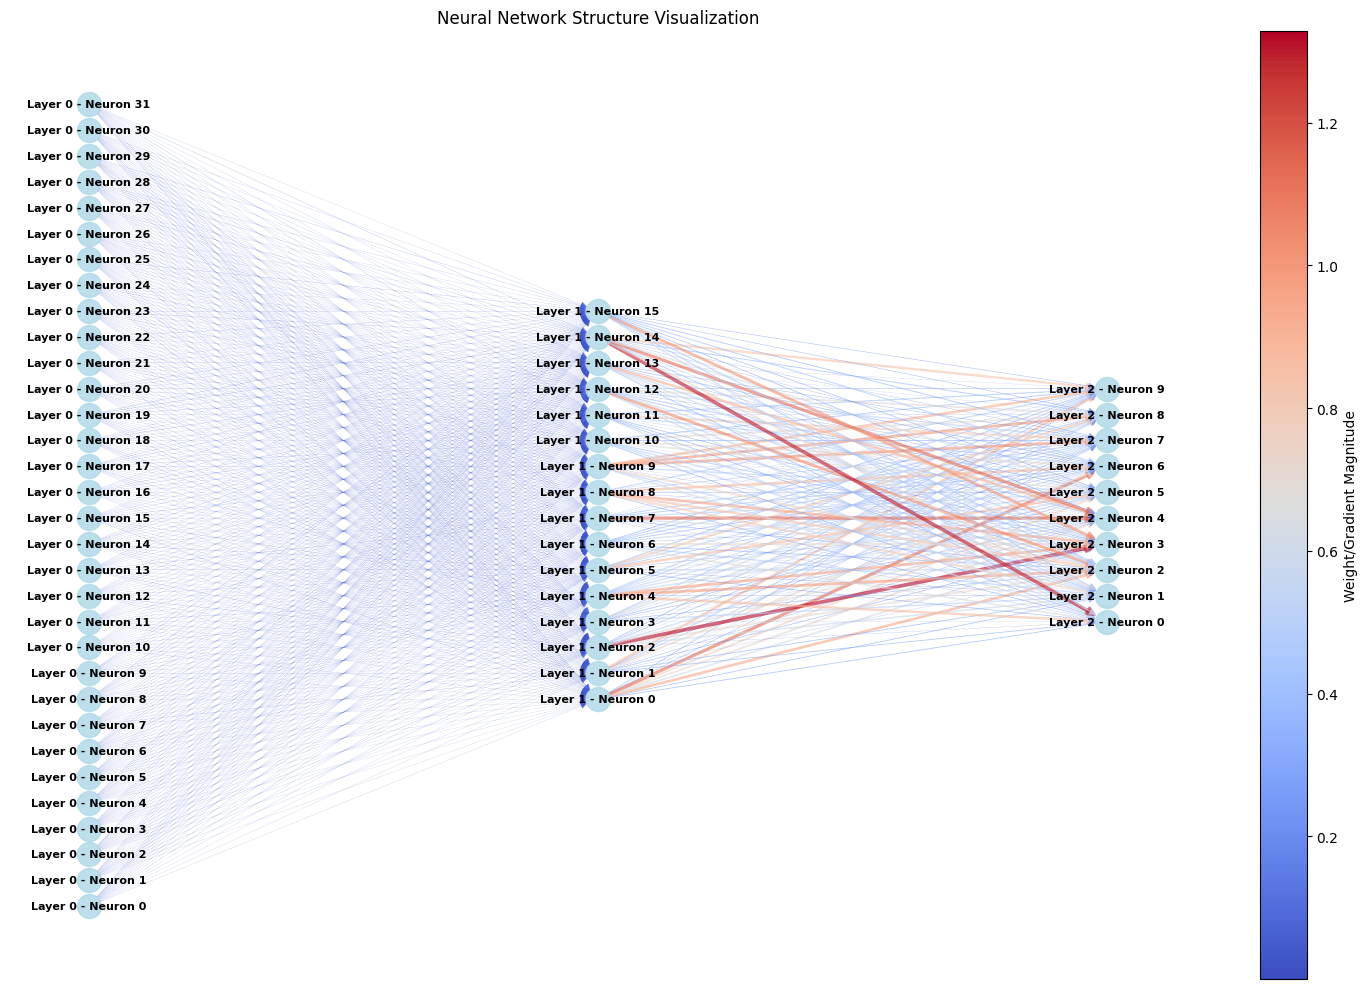

Visualizing Weight Distribution...


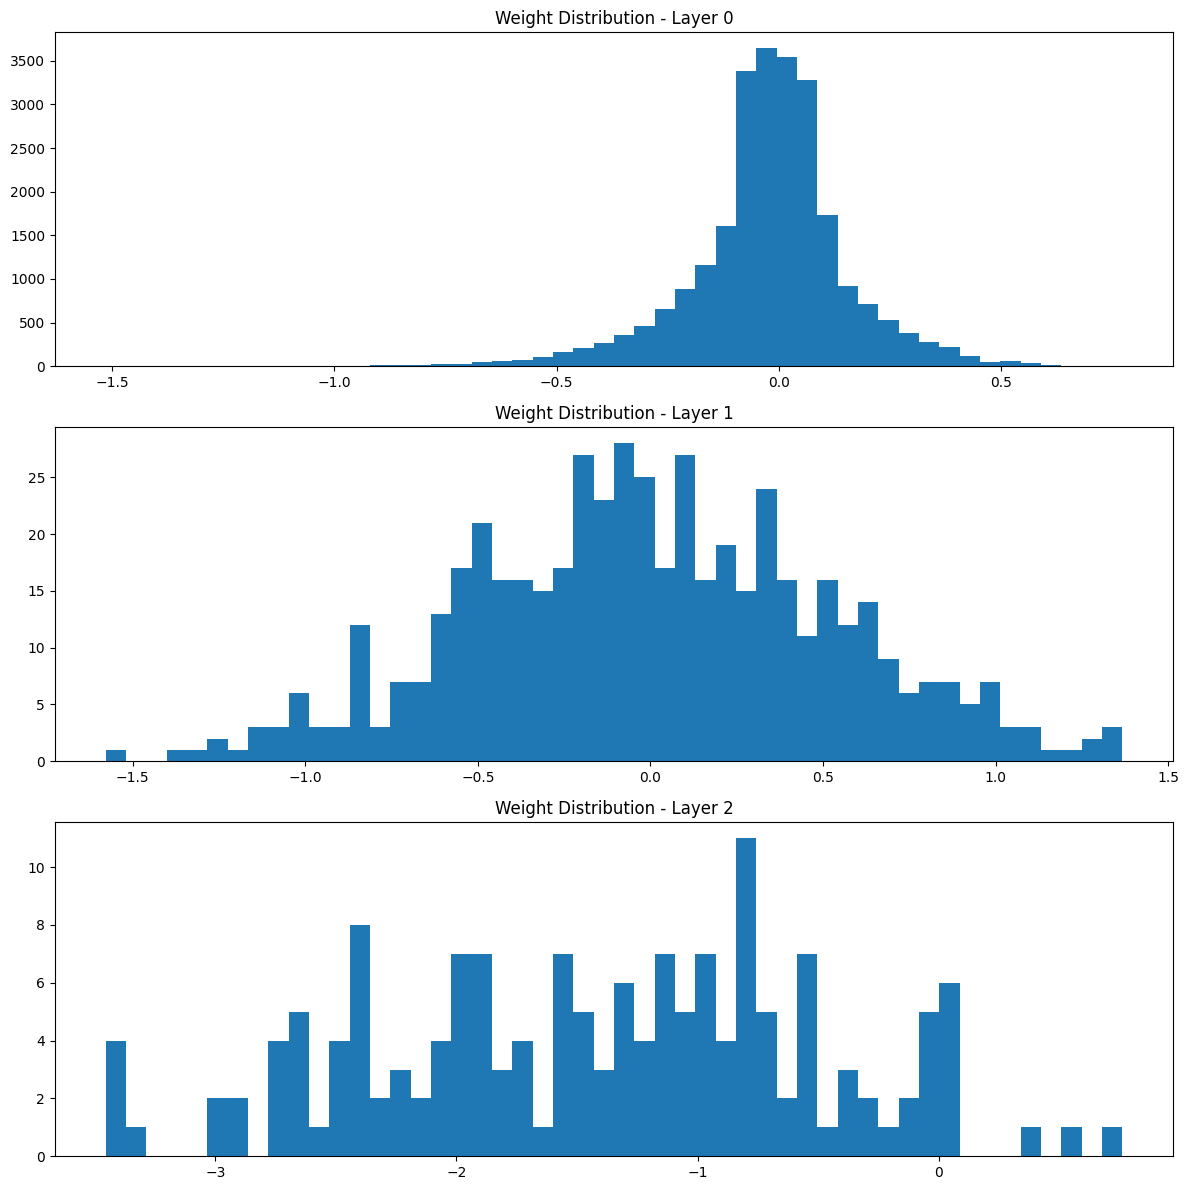

Visualizing Gradient Distribution...


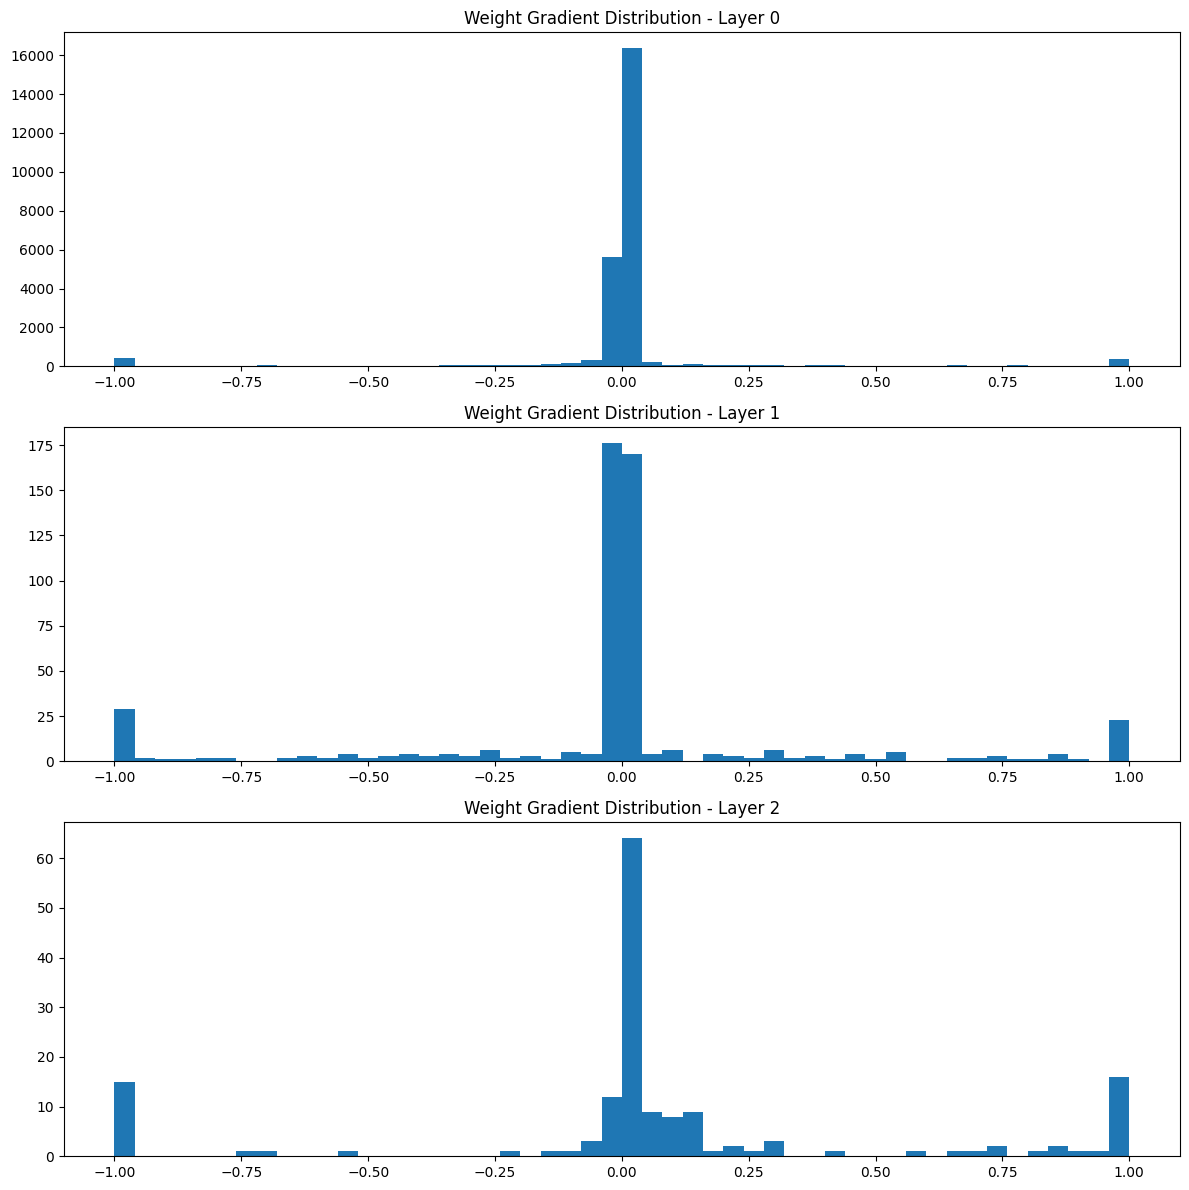

In [10]:
model = FFNN(
    layer_sizes=[784, 32, 16, 10],
    activation_func=['relu', 'relu', 'softmax'],
    loss_func='cce',
    weight_init='uniform',
    learning_rate=0.01
)
print("Training FFNN...")
model.train(X_train, y_train_onehot, X_test, y_test_onehot, epochs=10, batch_size=64, verbose=1)

visualize_ffnn_structure(model)
visualize_weight_distribution(model)
visualize_gradient_distribution(model)